# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
up=files.upload()
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx
Saving Problem_Statement(Airlines).txt to Problem_Statement(Airlines).txt


# problem statement

In [ ]:
with open('Problem_Statement(Airlines).txt','r') as f:
    print(f.read())

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card 

# EDA

In [ ]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
df.set_index('ID',inplace=True)
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1     28143           0          1          1          1          174   
2     19244           0          1          1          1          215   
3     41354           0          1          1          1         4123   
4     14776           0          1          1          1          500   
5     97752           0          4          1          1        43300   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
ID                                                                             
1             1                  0                0               7000      0  
2             2                  0                0               6968      0  
3             4                  0                0               7034      0  
4             1                  0                0               6952      0  
5            26               2077                4               6935      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
df.describe()

ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll        Award  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [ ]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
cat=[i for i in df.columns if df[i].nunique()<6]
num=[i for i in df.columns if i not in cat]

# continuous feature distribution

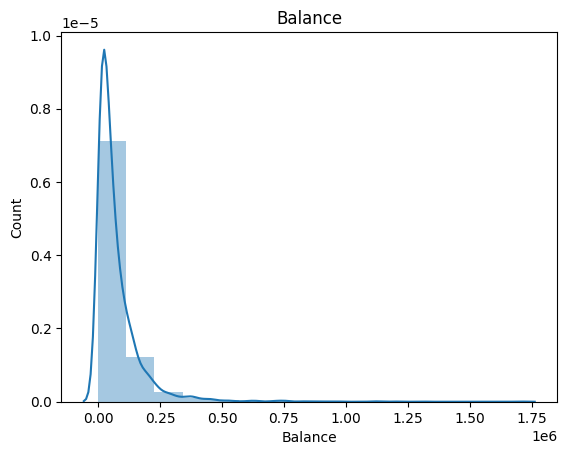

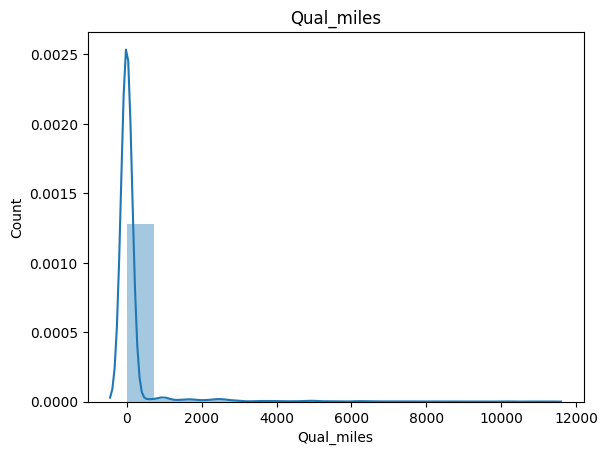

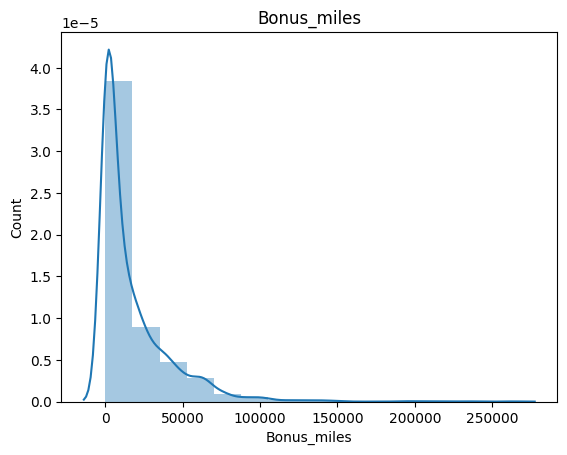

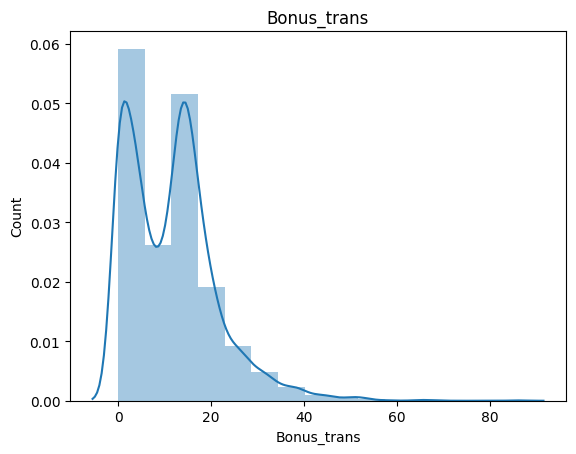

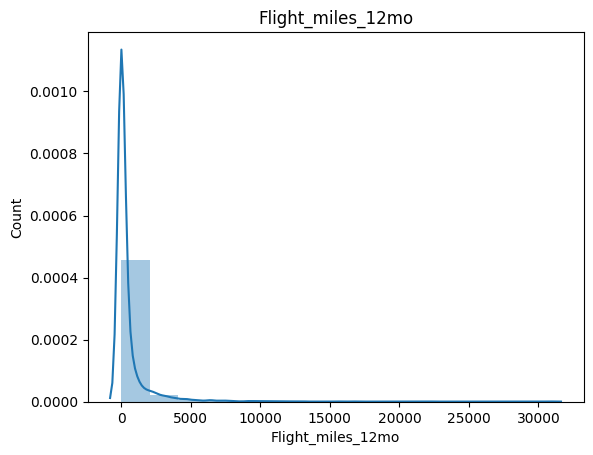

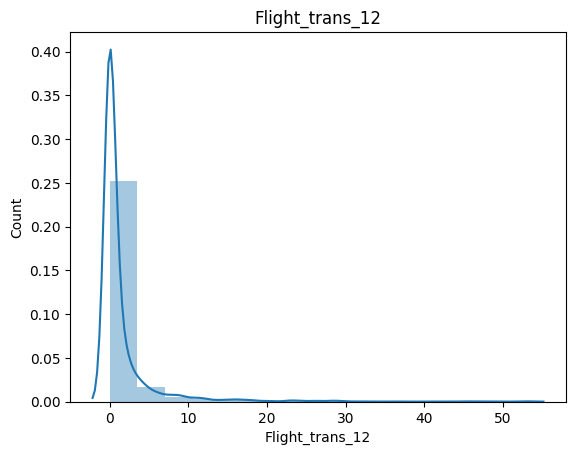

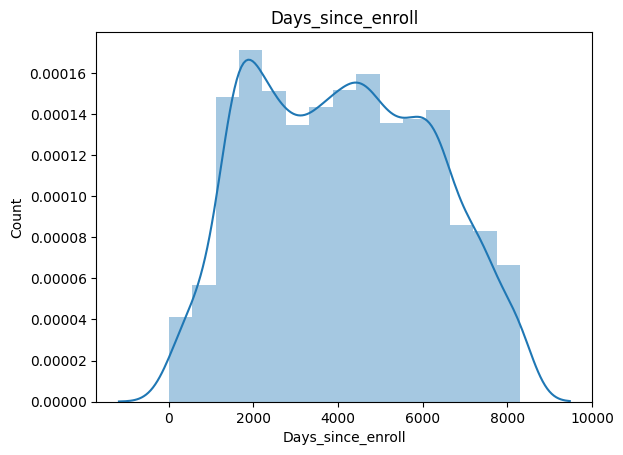

In [ ]:
data=df.copy()
for feature in data[num]:
    sns.distplot(data[feature],bins=15)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# categorical feature distribution

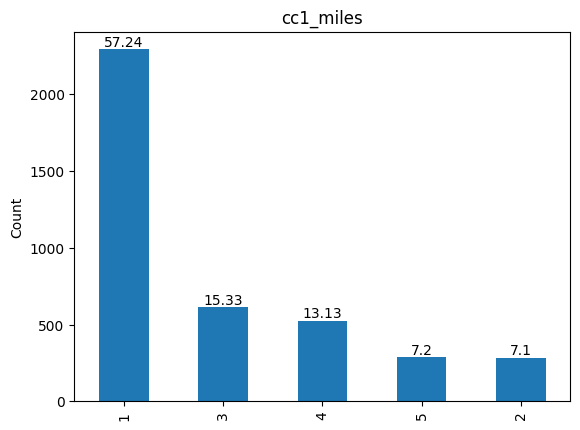

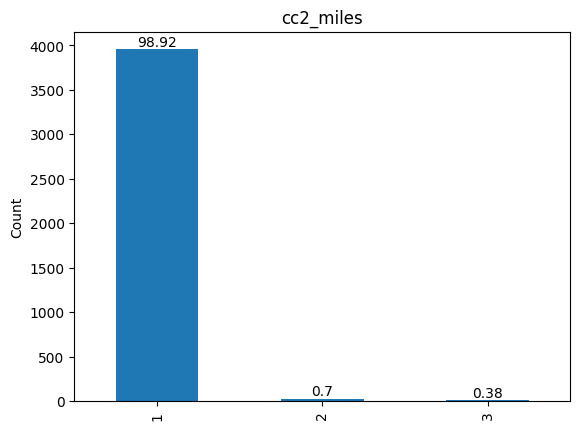

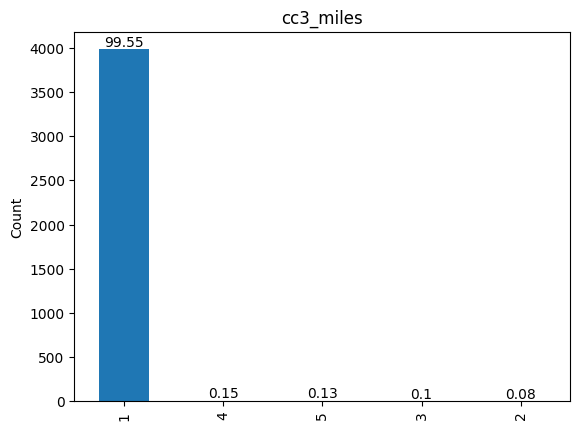

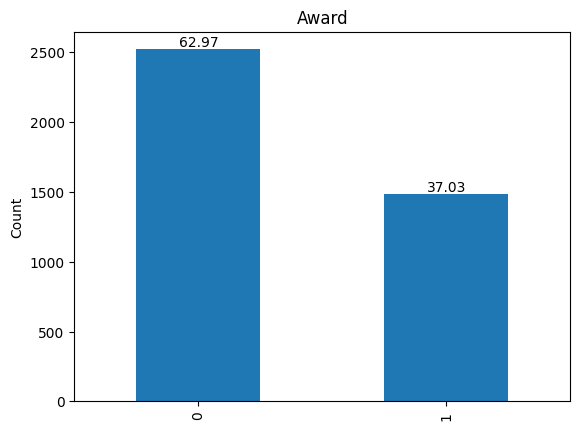

In [ ]:
data=df.copy()
for feature in data[cat]:
    pl=data[feature].value_counts().plot.bar()
    plt.ylabel('Count')
    for g,bar in enumerate(pl.containers):
        s=bar.datavalues.sum()
        pl.bar_label(bar,labels=(bar.datavalues/s*100).round(2))
    plt.title(feature)
    plt.show()

# Outliers

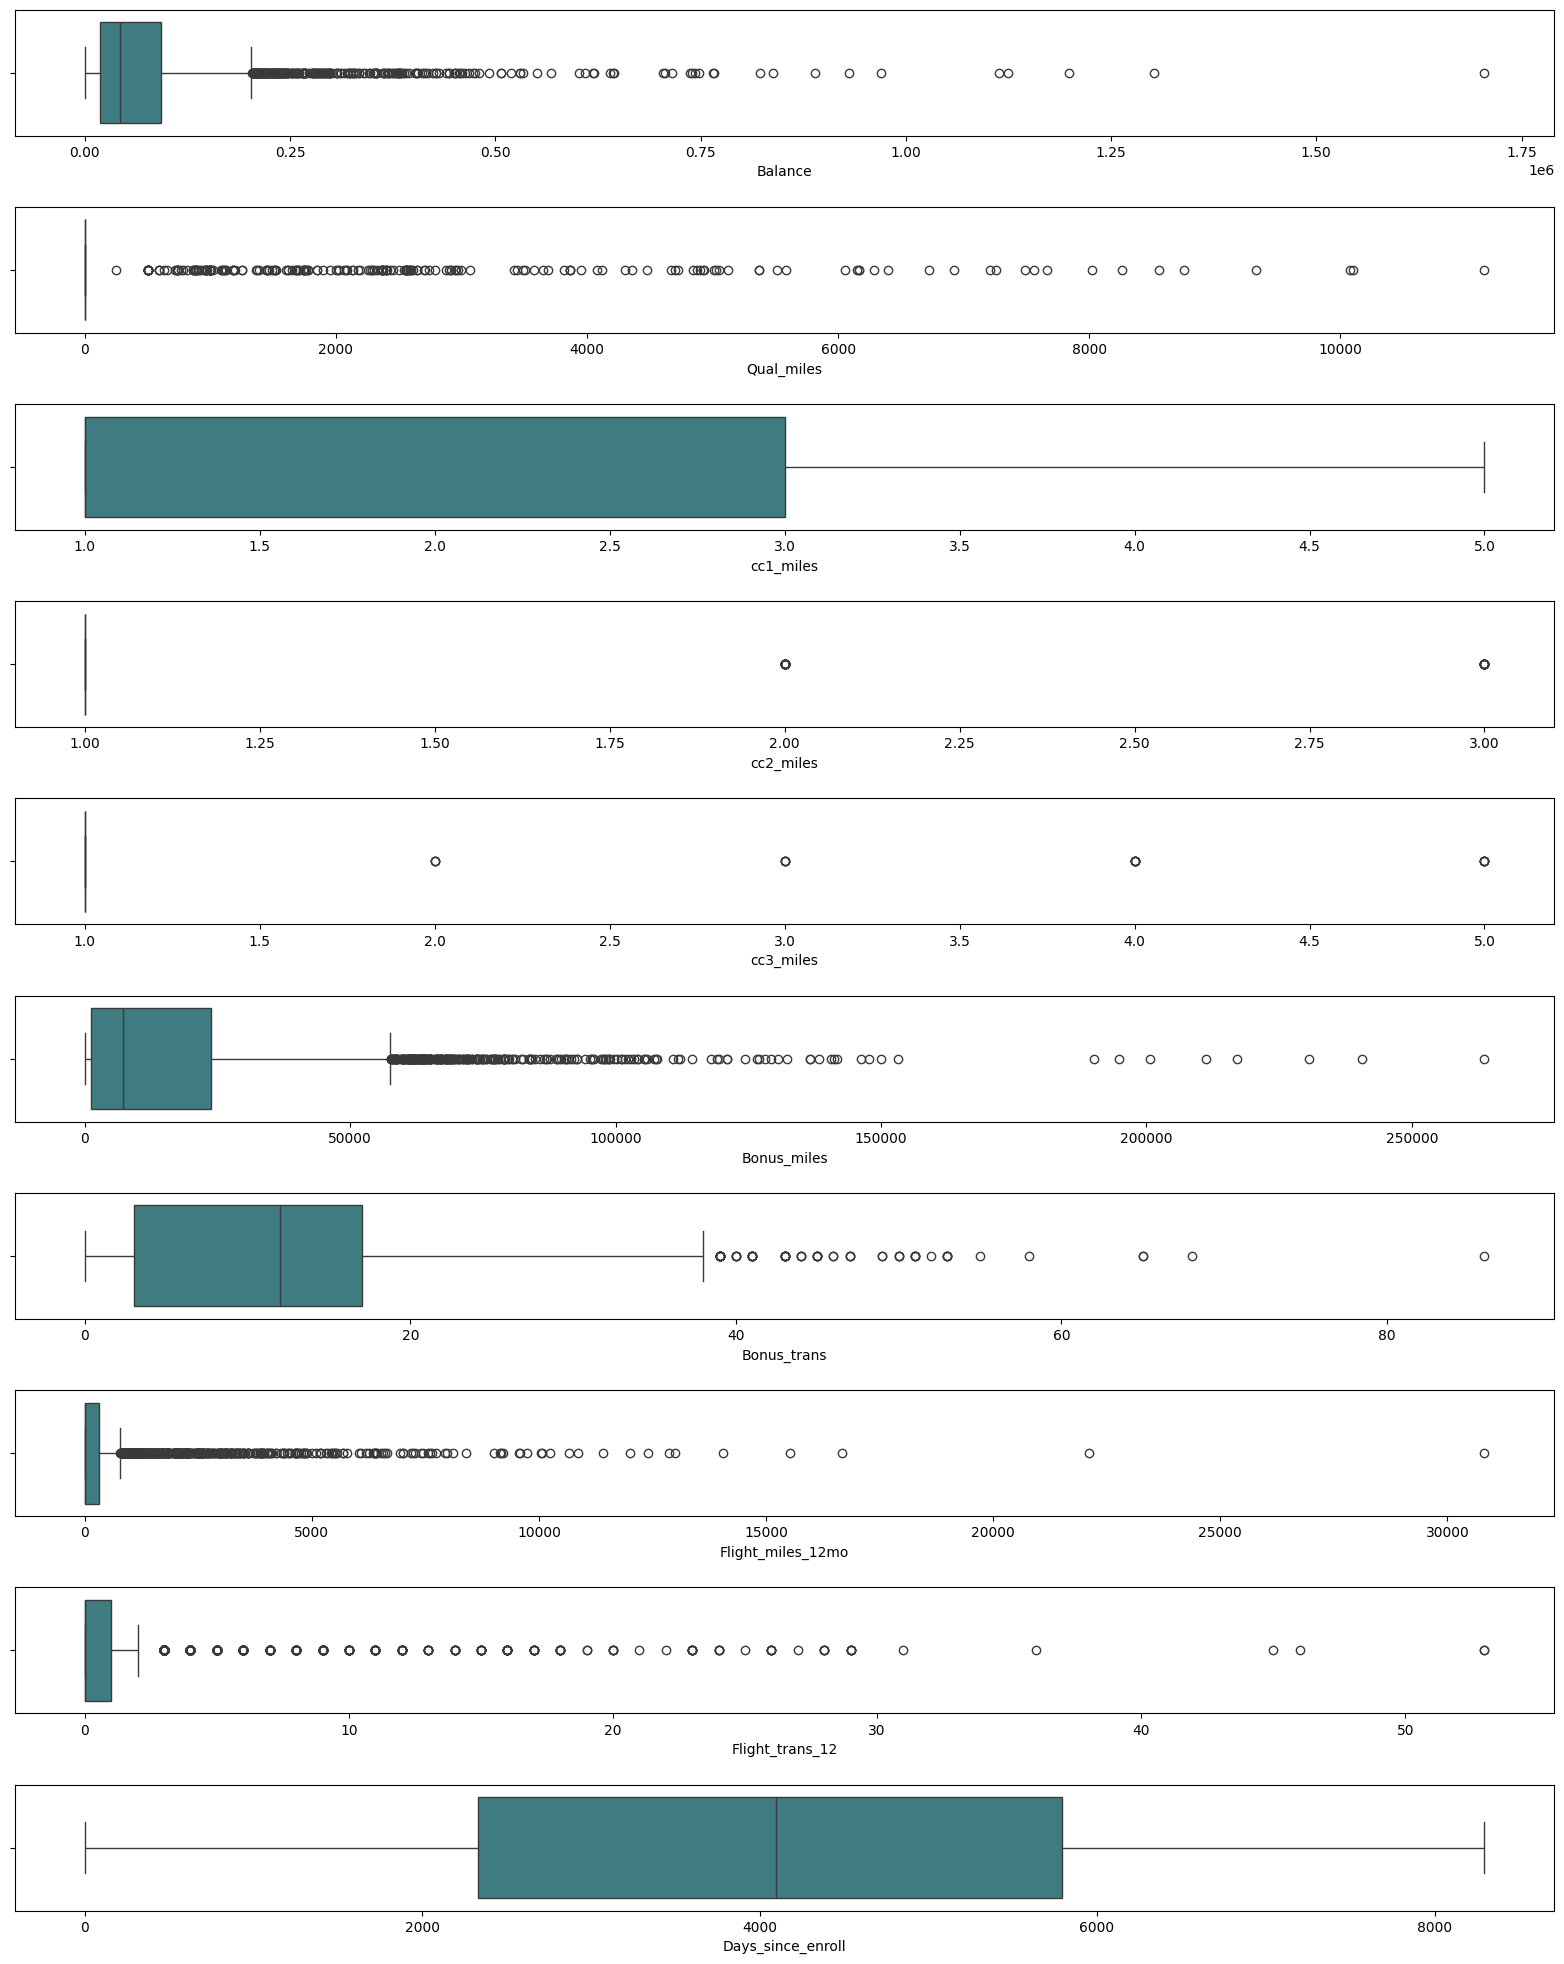

In [ ]:
fig, axes=plt.subplots(10,1,figsize=(16,20),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=data,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=data,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=data,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=data,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0);

# data square root transformation

<Axes: >

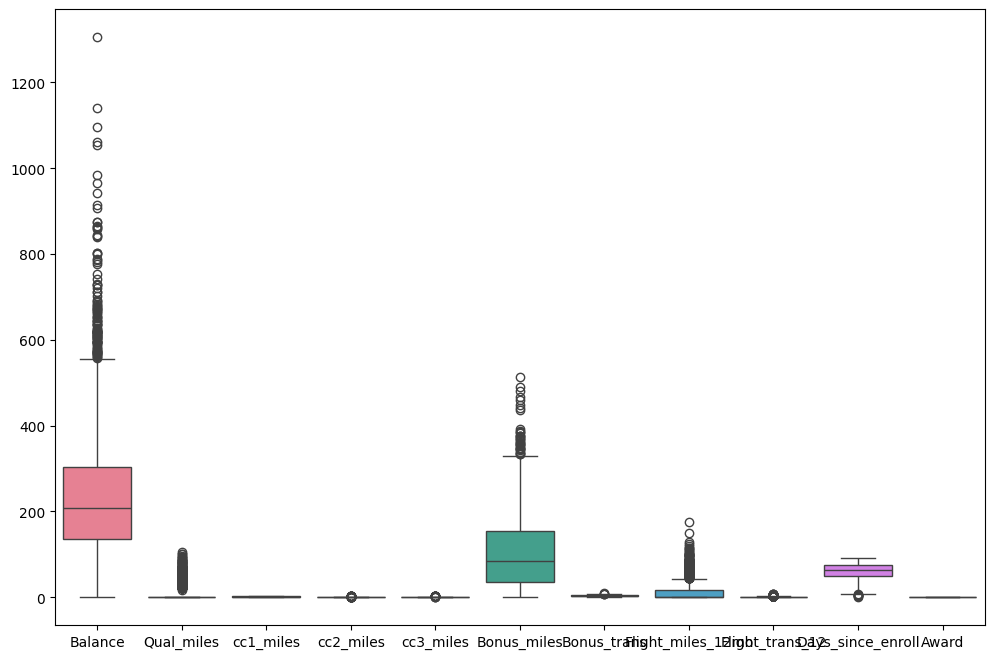

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

# Proportion of target class

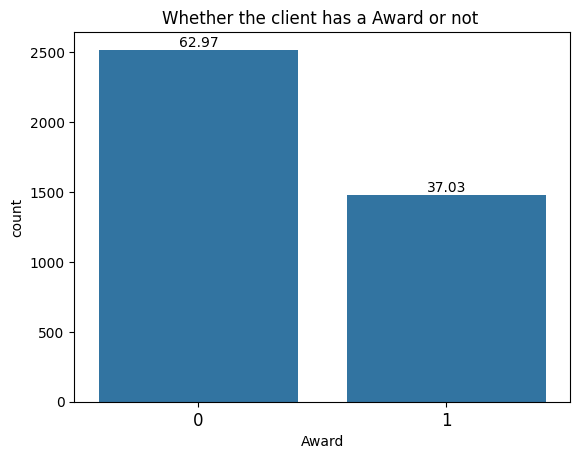

In [ ]:
ax=sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')
for i in ax.containers:
    ax.bar_label(i,labels=(i.datavalues/i.datavalues.sum()*100).round(2))

# Feature relations

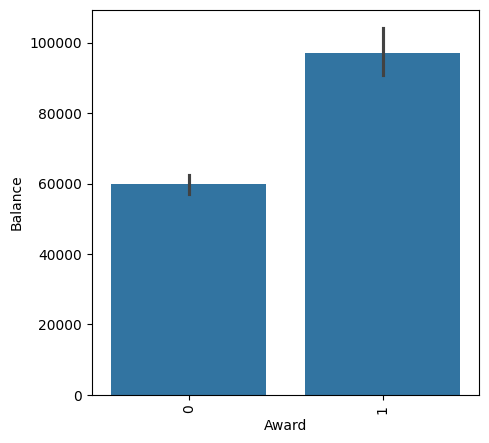

In [ ]:
plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

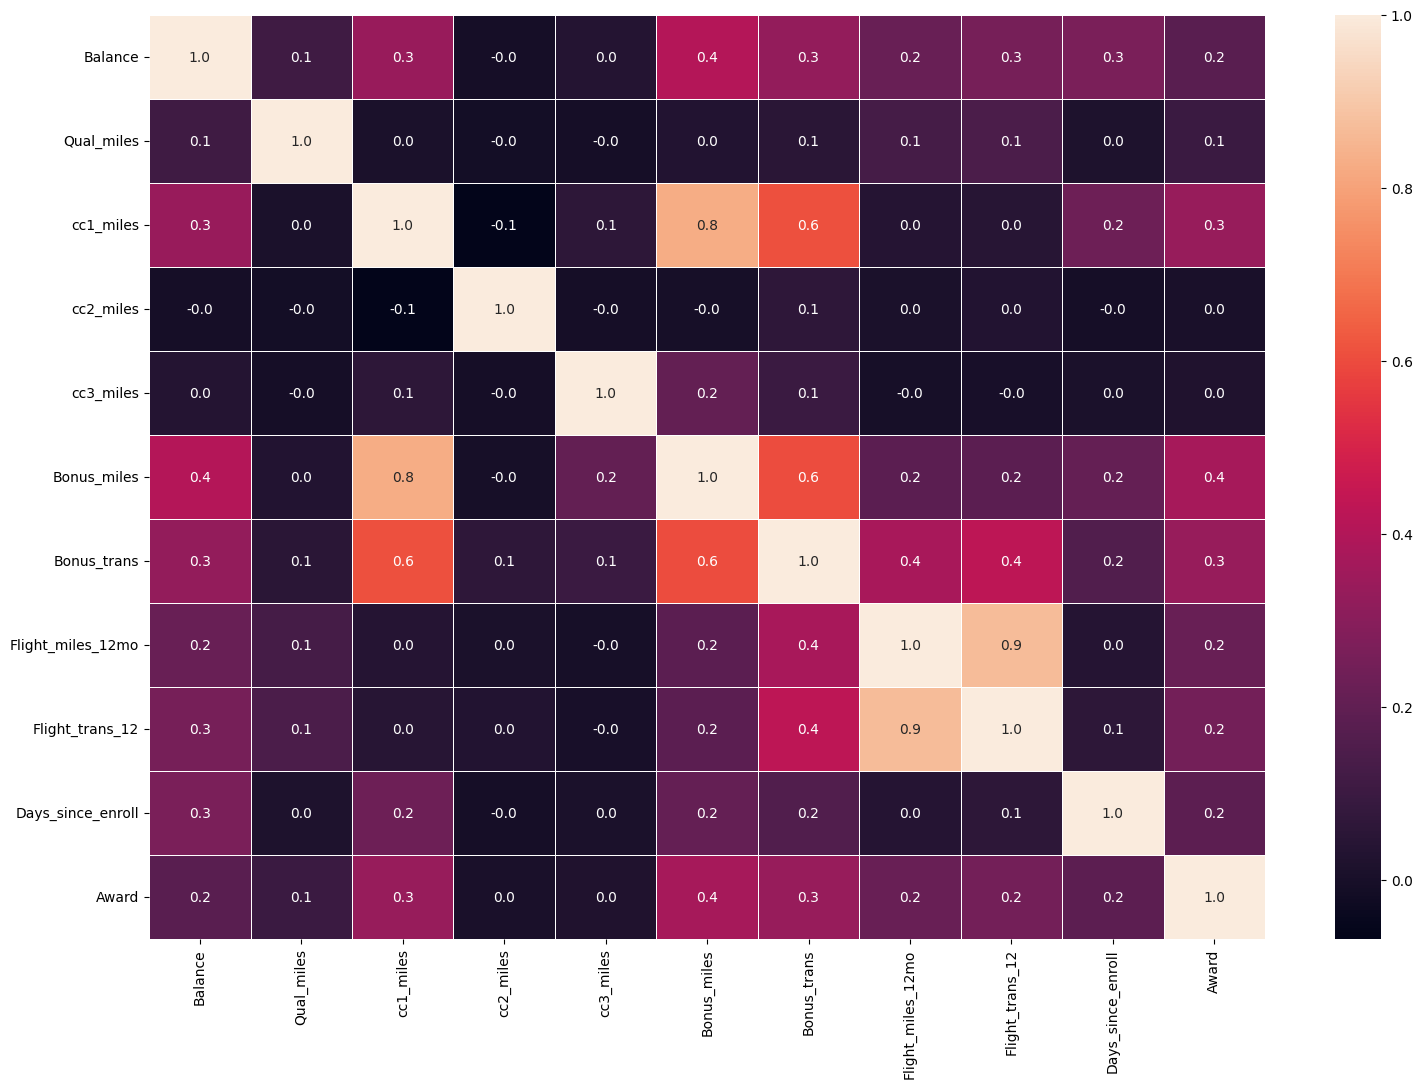

In [ ]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

## **Unique points in this correlation matrix:**

+ **flight_trans_12 is positively correlated with flight_miles_12mo**<br>
+ **bonus_trans is positively correlated with cc1_miles**
+ **bonus_trans is positively correlated with bonus_miles**
+ **bonus_miles is positively correlated with cc1_miles**




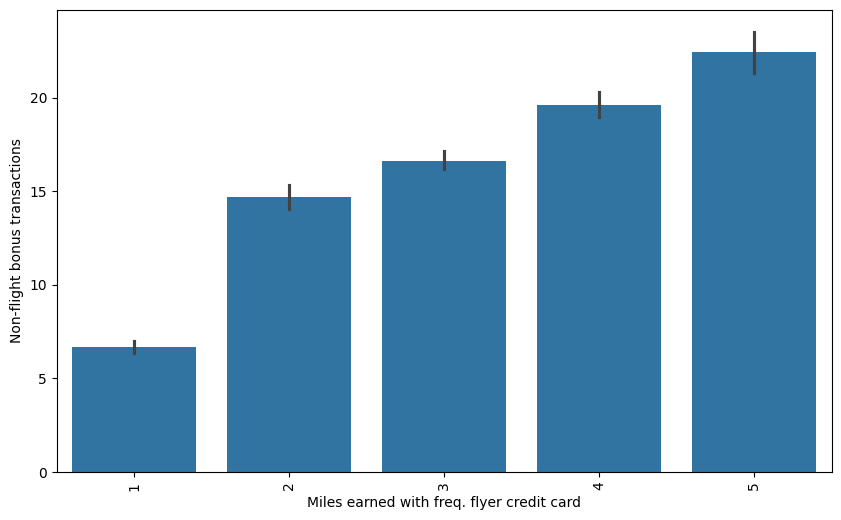

In [ ]:
plt.figure(figsize = (10,6))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)

minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)




---


# **KMeans Clustering**



# Applied on  Standard Scaled Data


In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
cluster_range = range(1,9)
wcss = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    wcss.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"wcss":wcss})
clusters_df

num_clusters          wcss
0             1  43989.000000
1             2  35409.511452
2             3  30899.318509
3             4  27162.193190
4             5  24884.156959
5             6  21756.886174
6             7  18891.750169
7             8  17316.787532

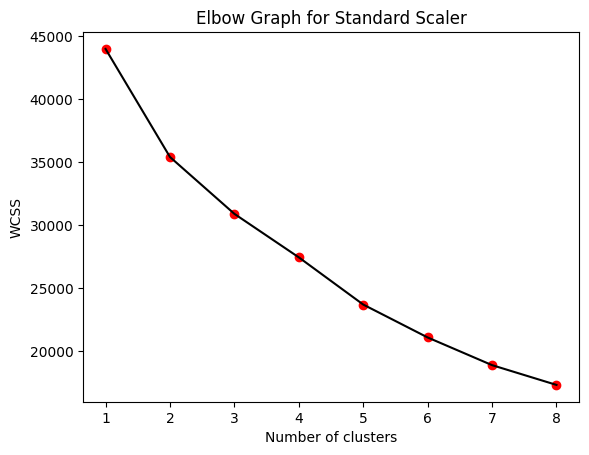

In [ ]:
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score**

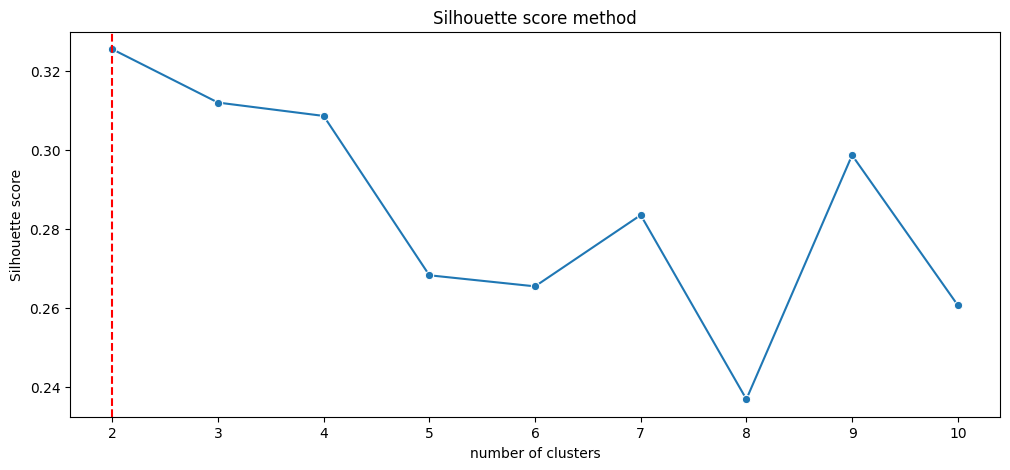

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = range(2,11)
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n,init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg)
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters,y= s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.show()

Elbow Plot for Standard Scaler data


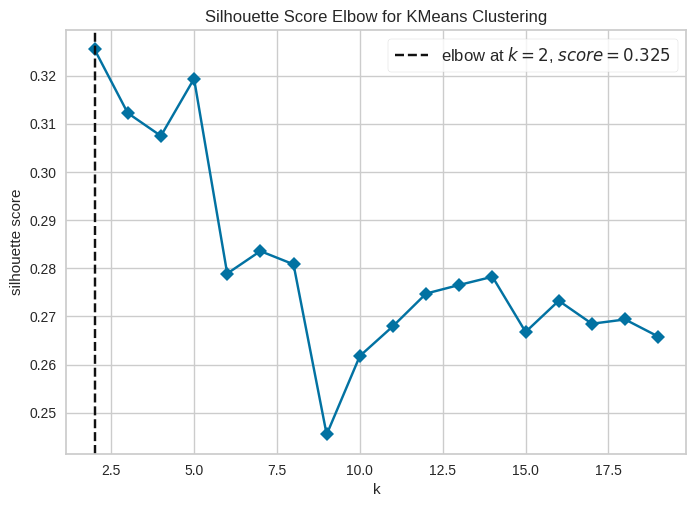

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= silhouette_score(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


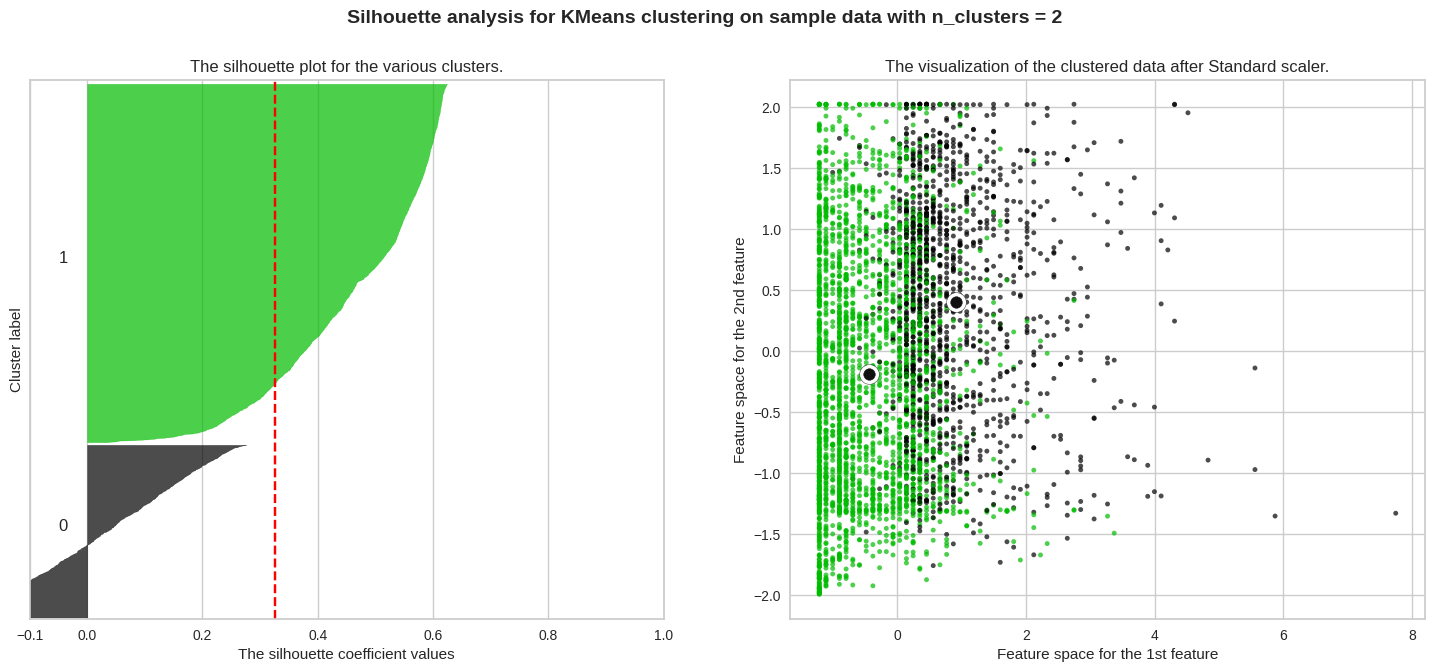

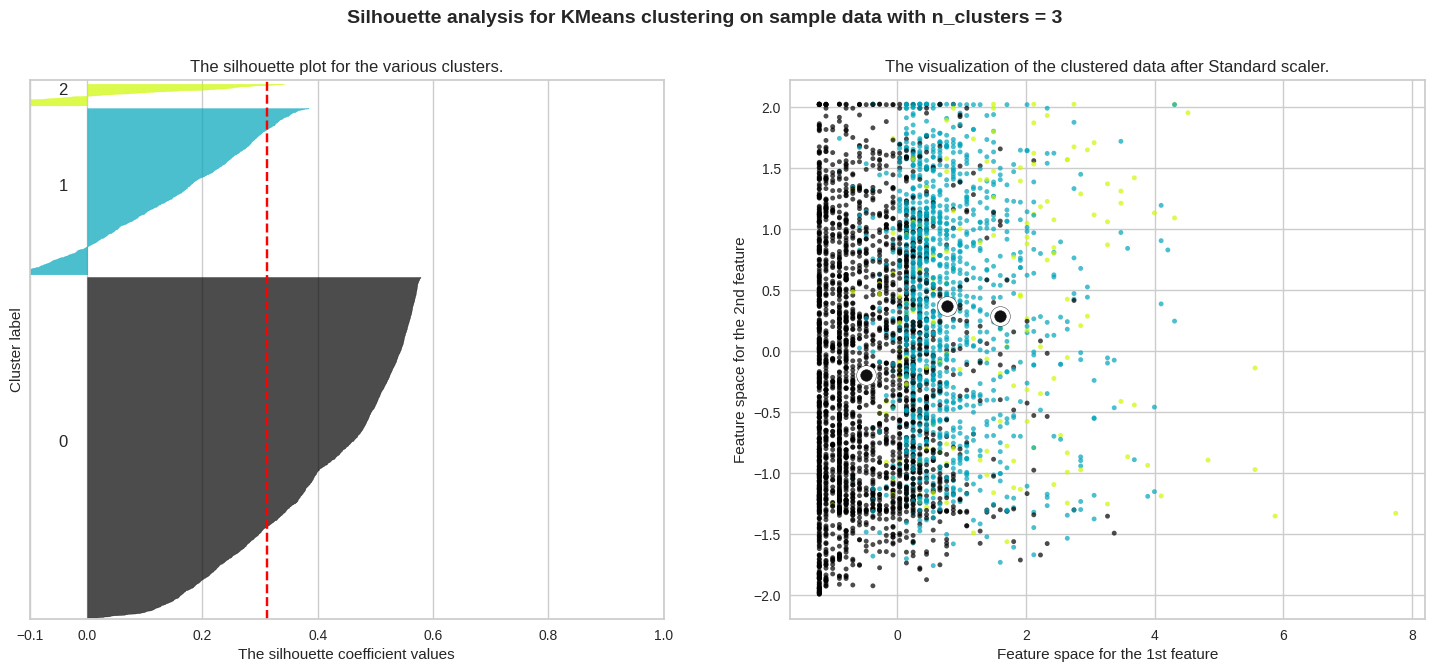

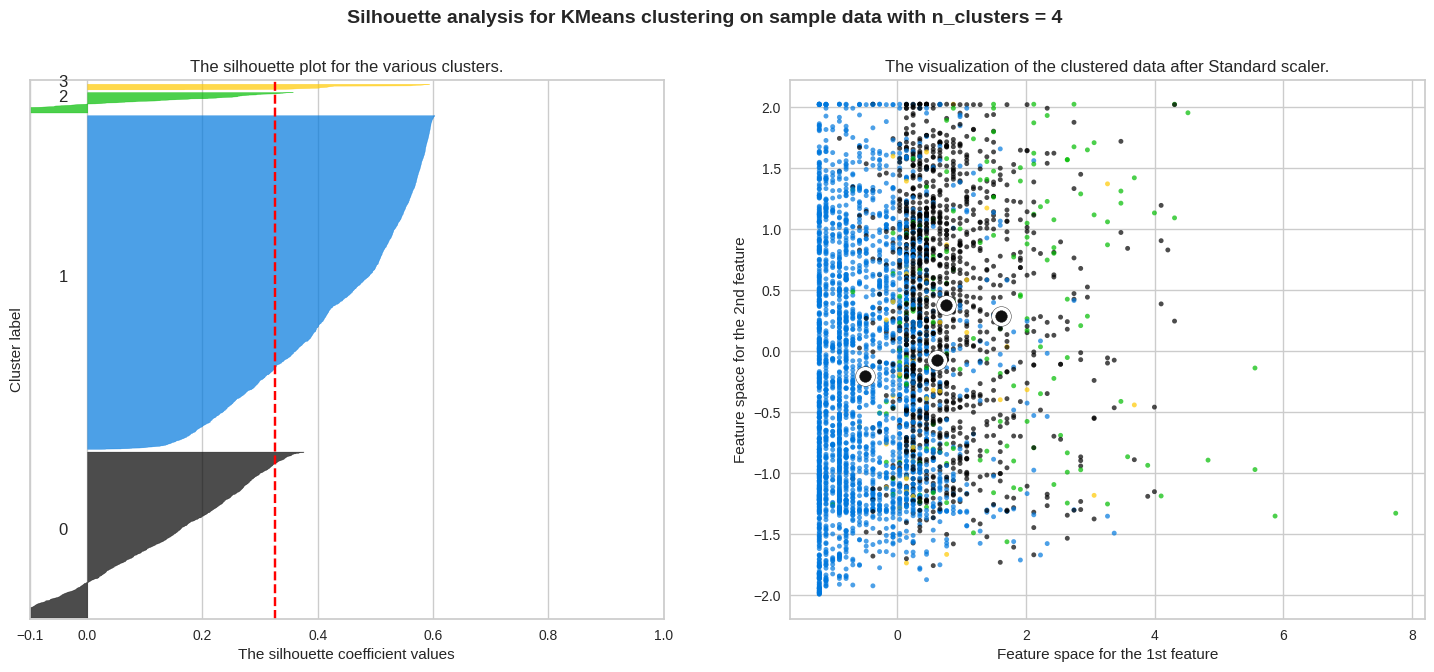

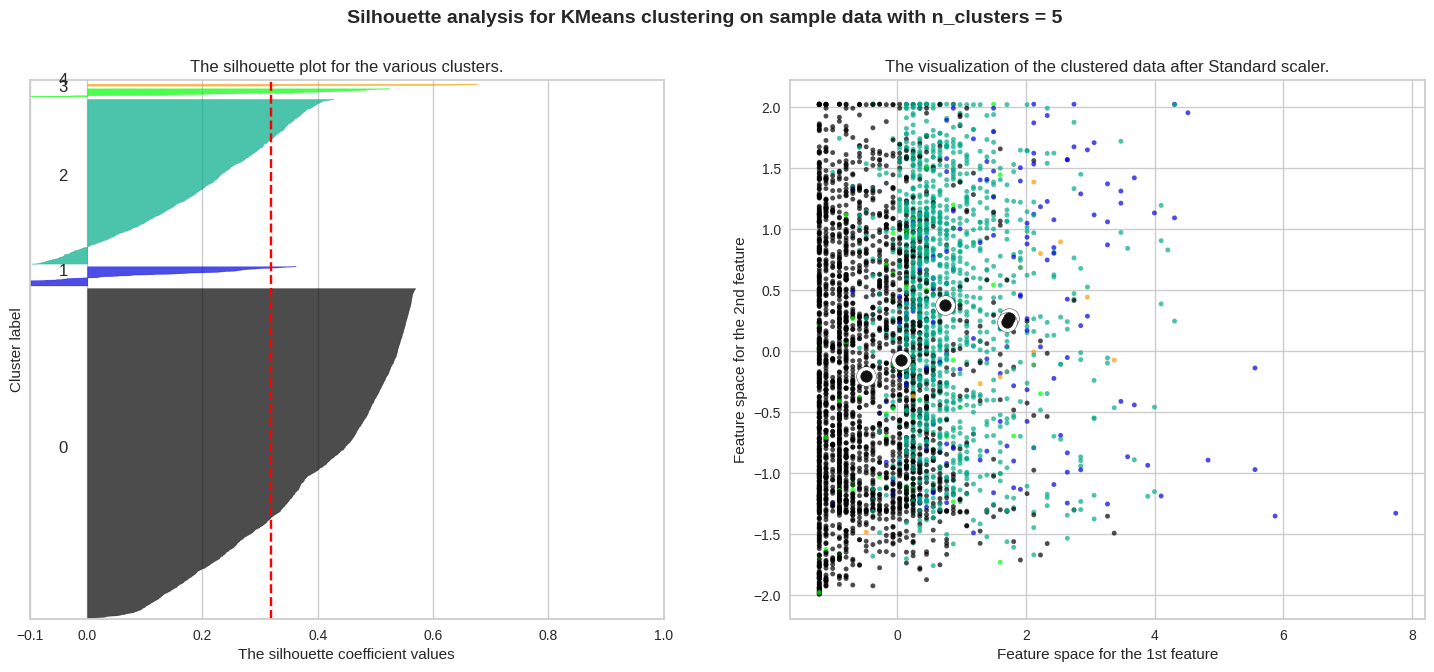

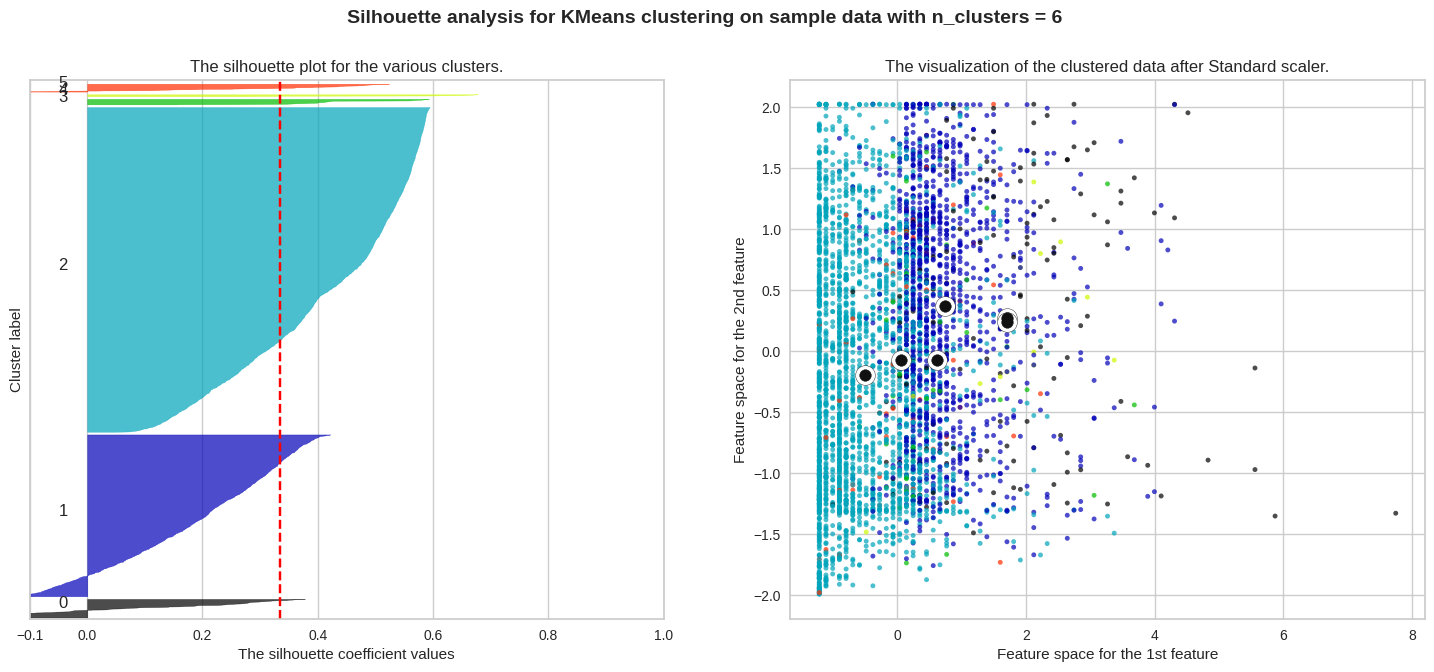

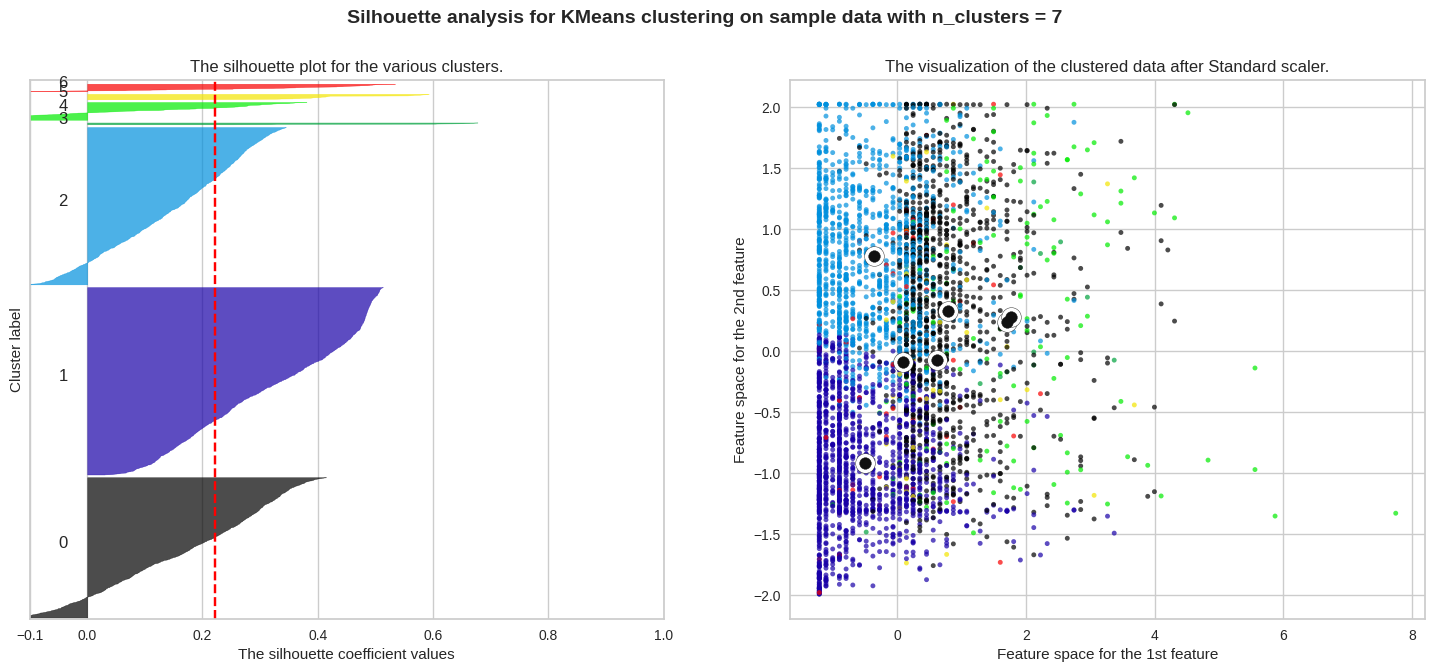

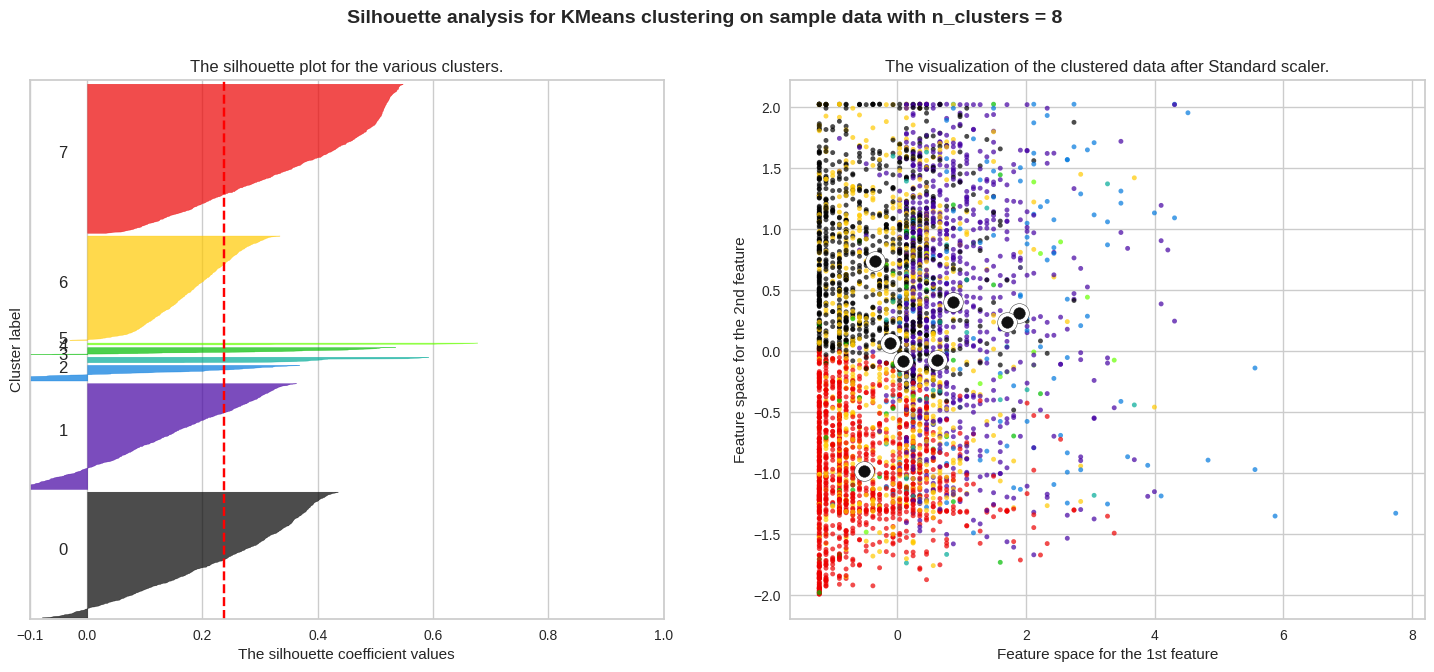

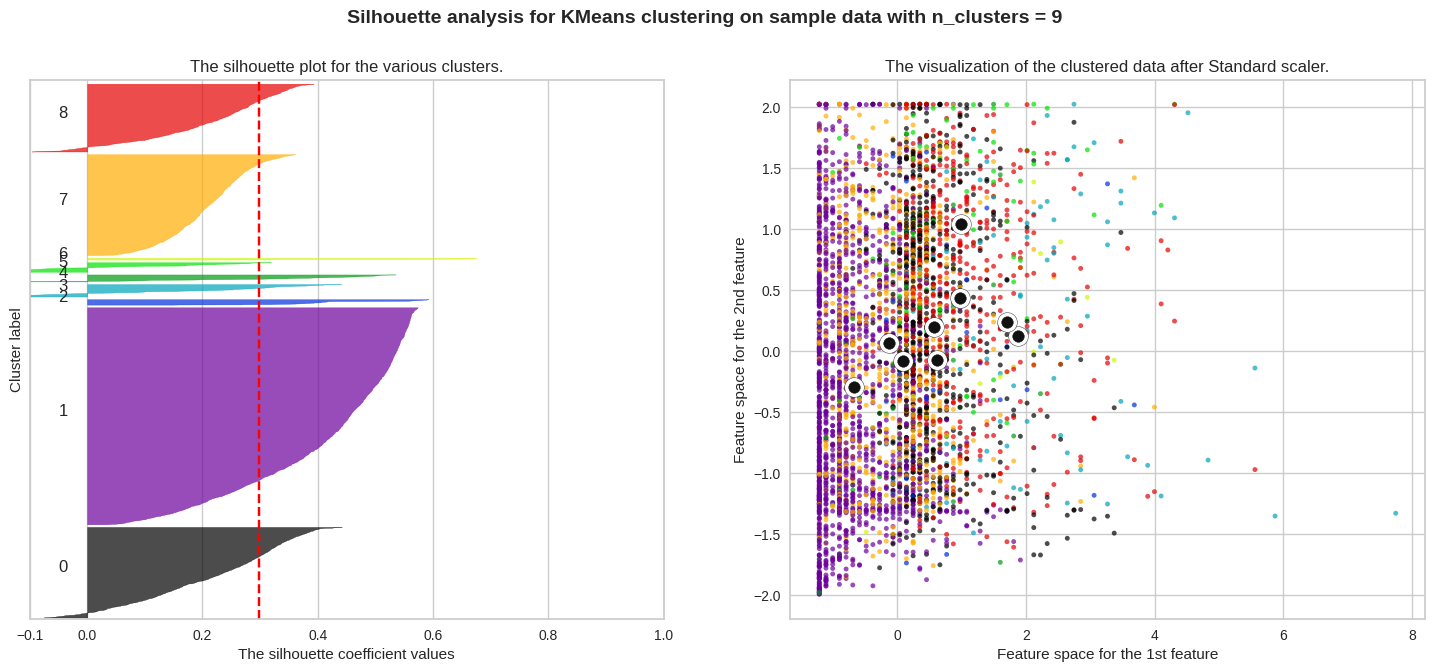

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 20])
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 20

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='o' , alpha=1,
                    s=70, color='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **insight:**

### **The standardized data, the ideal number of clusters is 6, with a score of 0.33**

# Build KMeans Cluster Model

In [ ]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
model_kmeans.inertia_

21089.973628929638

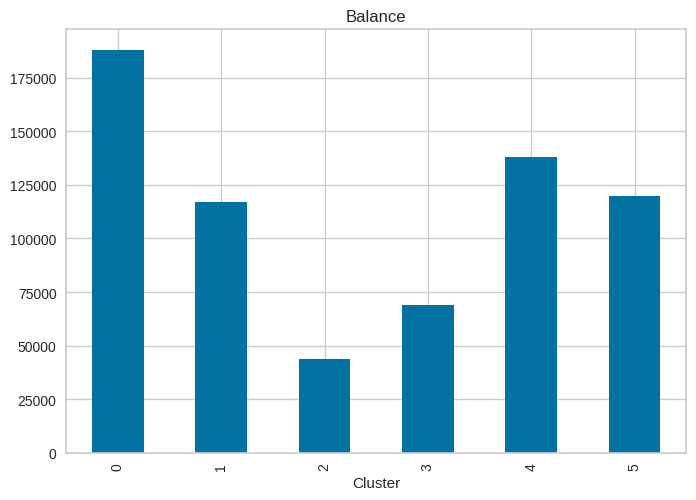

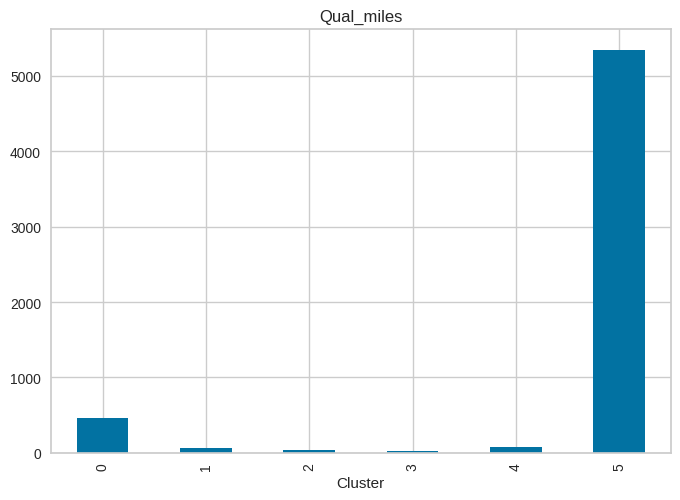

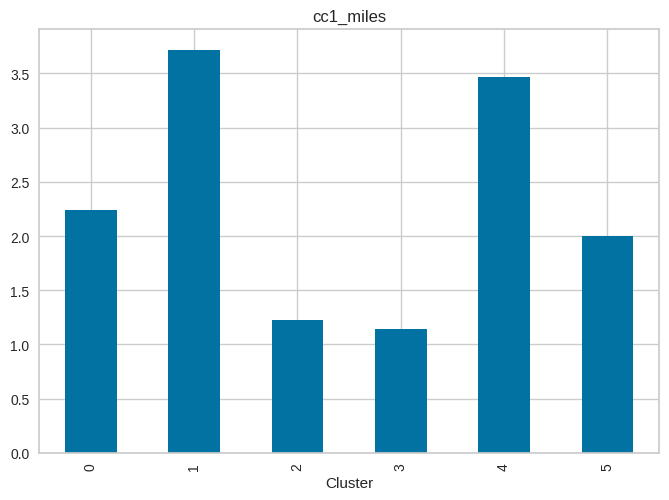

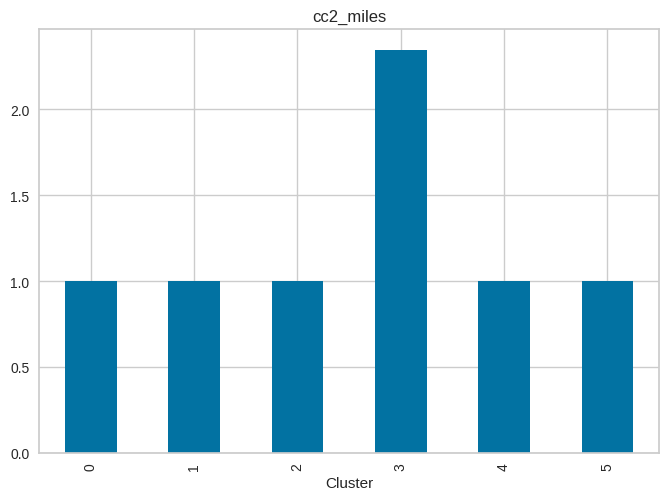

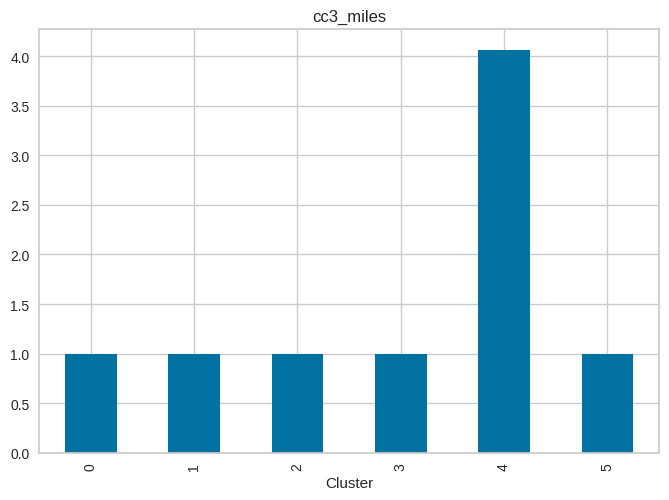

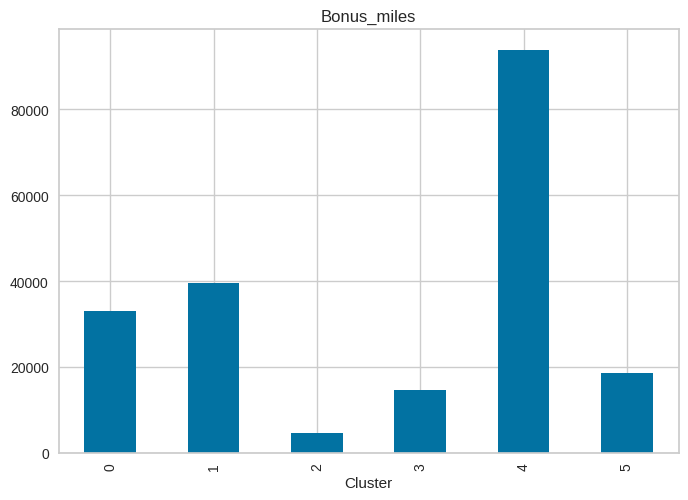

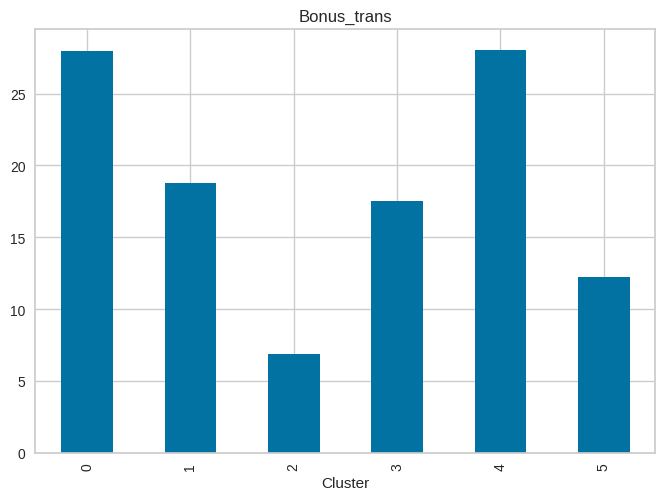

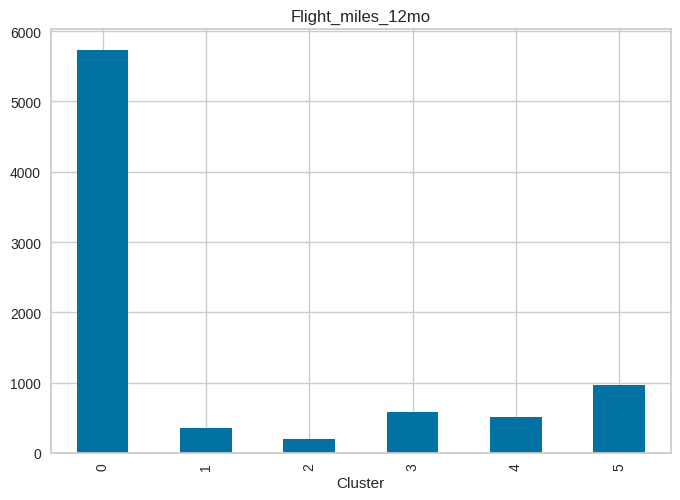

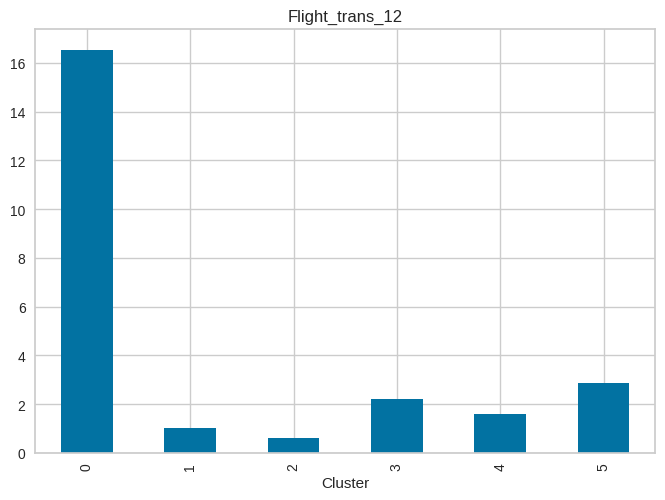

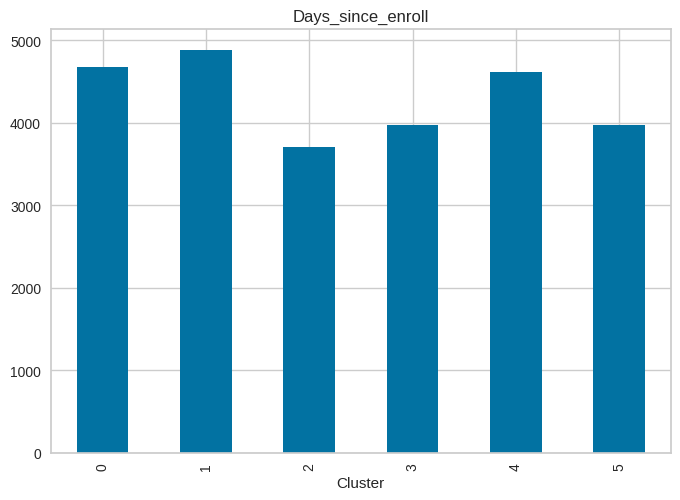

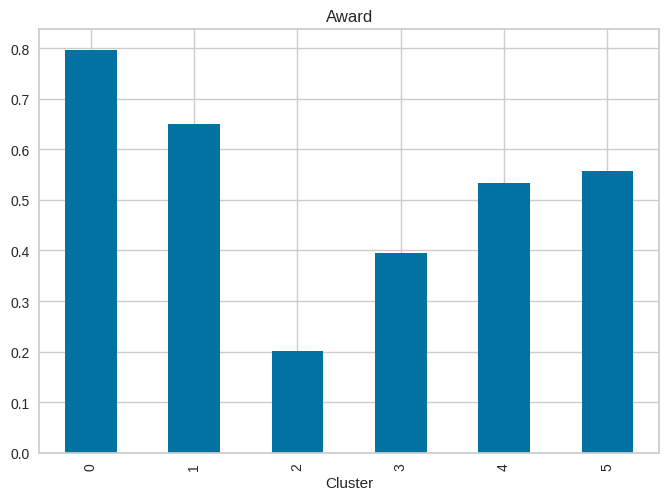

In [ ]:
data=df.copy()
data['Cluster'] = model_kmeans.labels_
for i in data.columns[:-1]:
    plt.figure()
    data.groupby('Cluster')[i].mean().plot.bar(title=i)

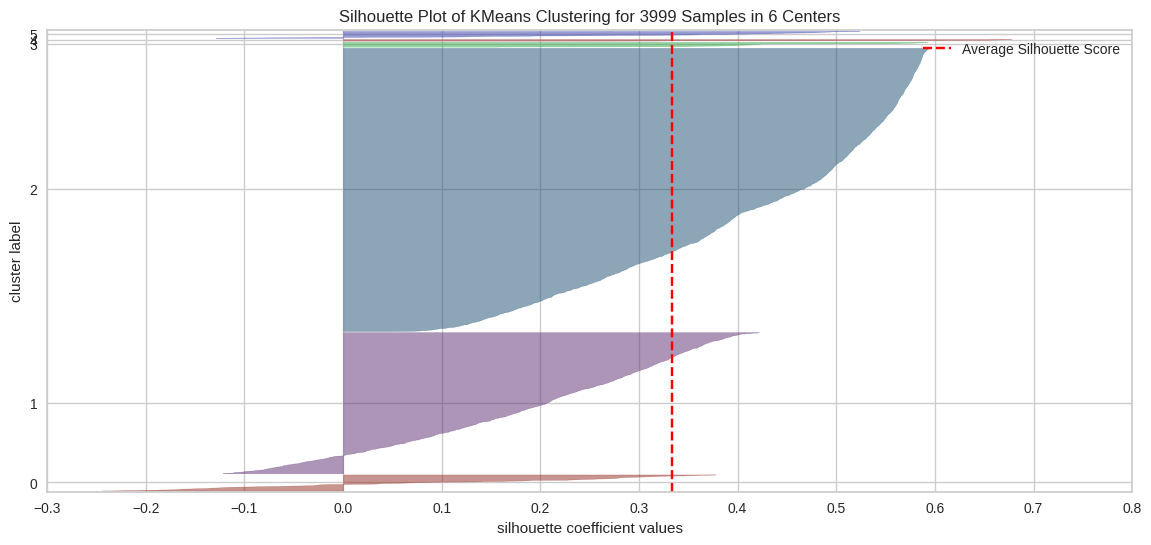

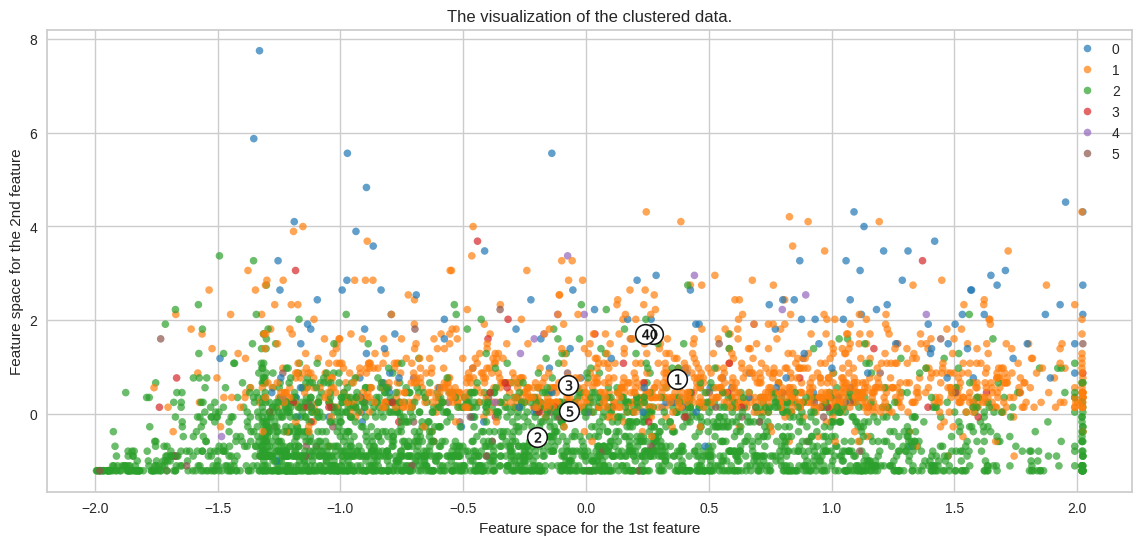

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(14,6))
sil_visualizer1 = SilhouetteVisualizer(model_kmeans, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_df)
sil_visualizer1.show()

plt.figure(figsize=(14,6))
sns.scatterplot(x=std_df[:, 9],y= std_df[:, 6], s=30, lw=0, alpha=0.7,
                hue=y_predict_kmeans, edgecolor='k',palette='tab10')
c=centers1 = np.array(model_kmeans.cluster_centers_)
sns.scatterplot(x=centers1[:, 9],y= centers1[:, 6], marker='o',c="white", alpha=1, s=200, edgecolor='k')
for i in range(len(c)):
    plt.scatter(x=c[i][9],y=c[i][6],marker='$%d$' %i ,alpha=1,s=50, edgecolor='k',color='k')
plt.title(label ="The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()

# cluster distribution

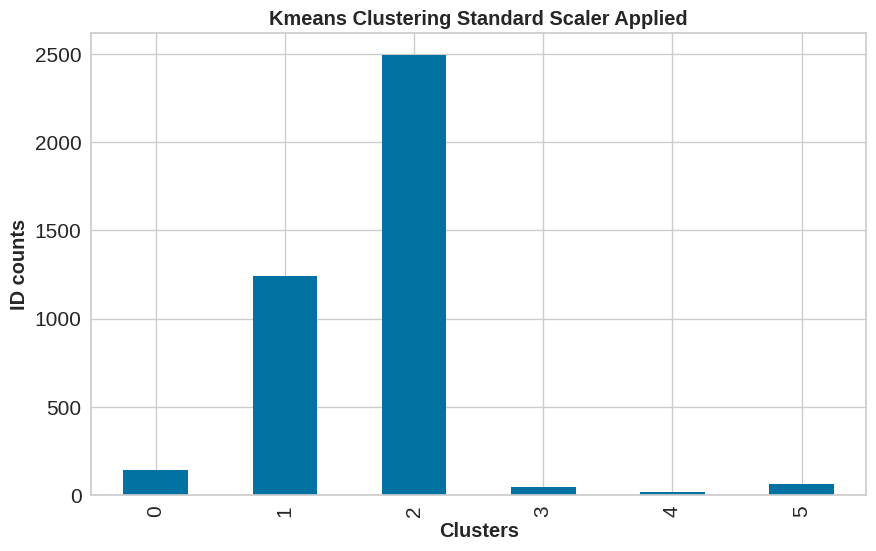

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Cluster']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **Model On MinMaxScaler Applied Data**

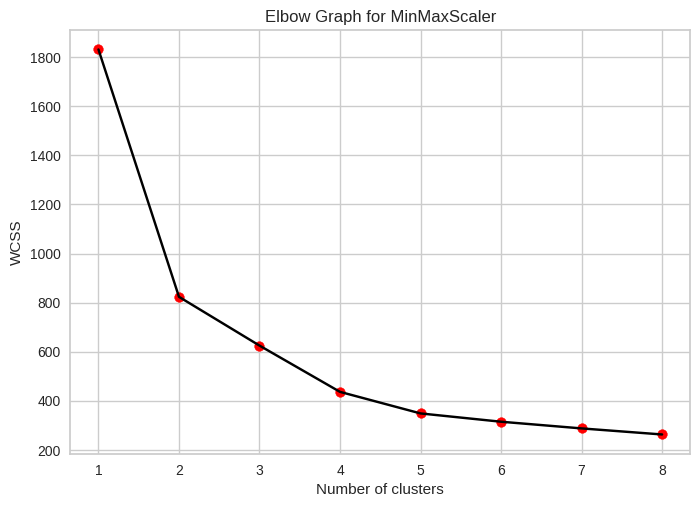

In [ ]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

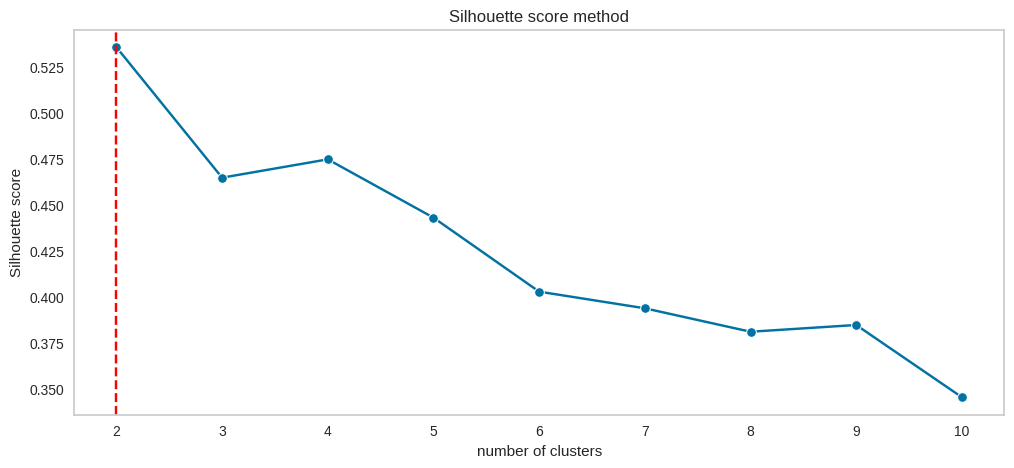

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters,y= s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= silhouette_score(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.38865859989228385
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832


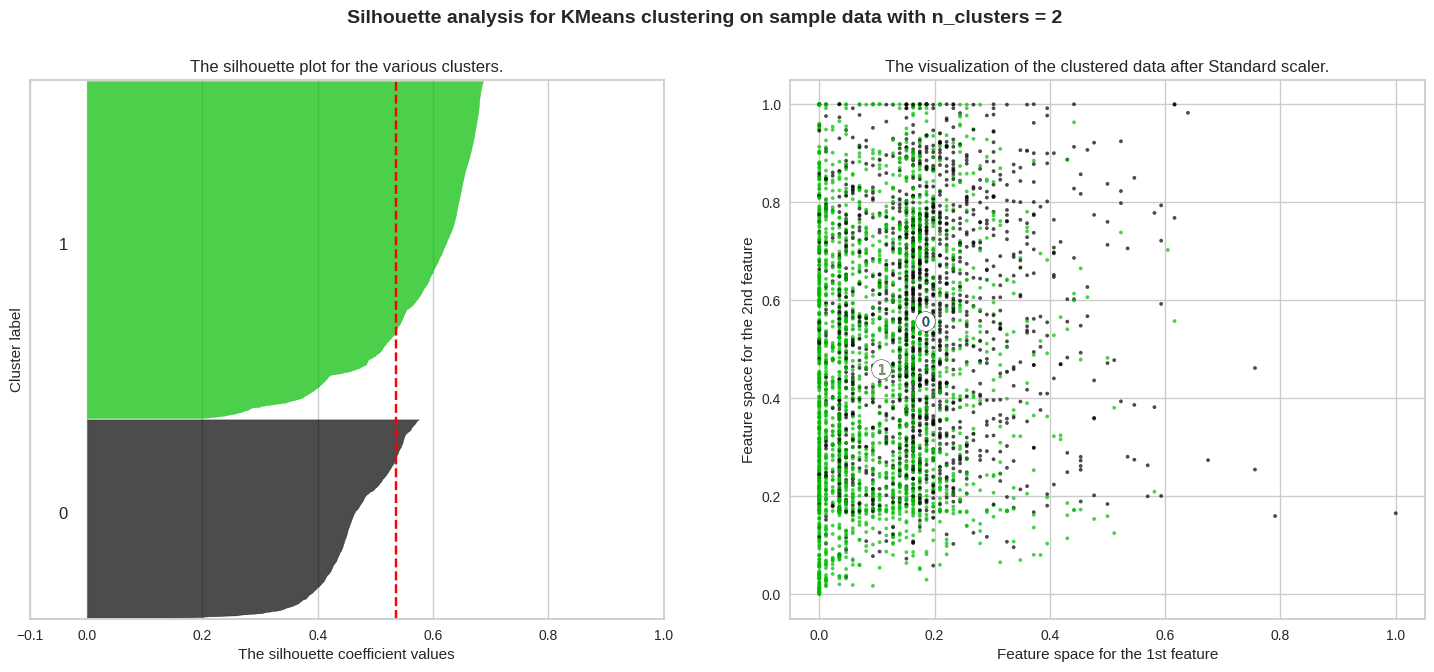

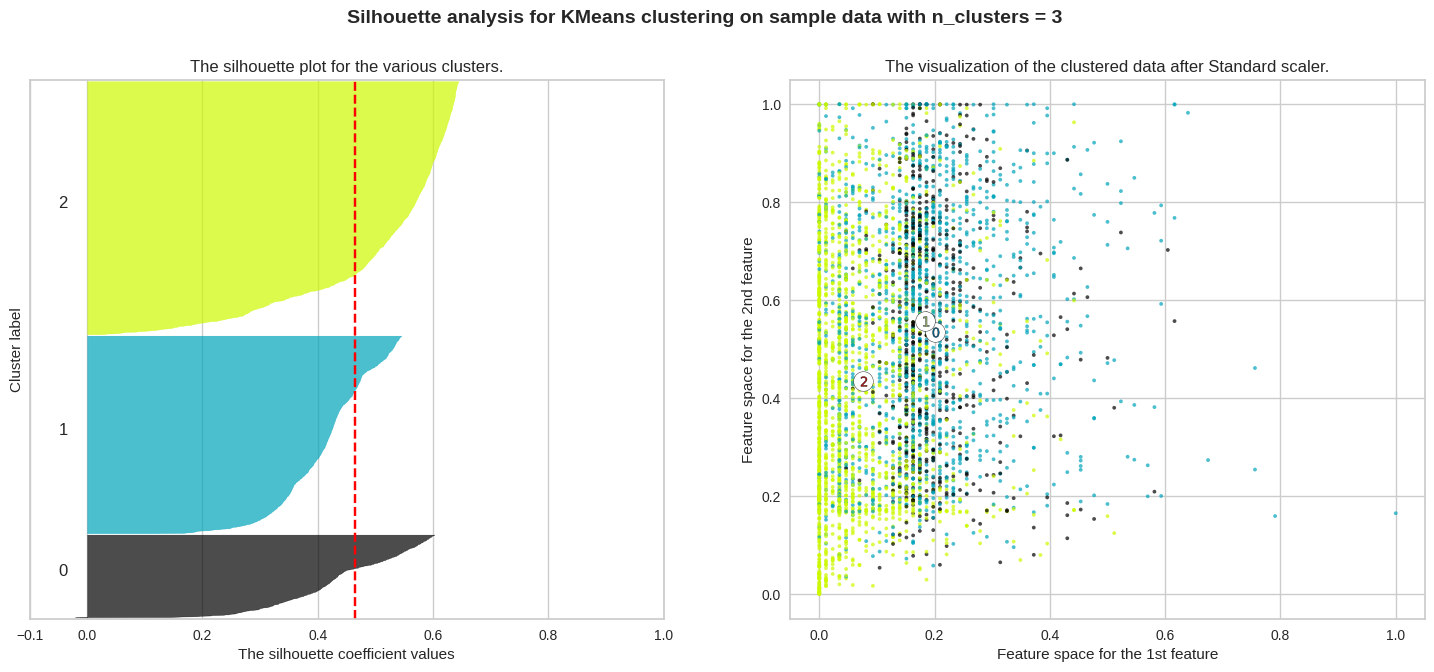

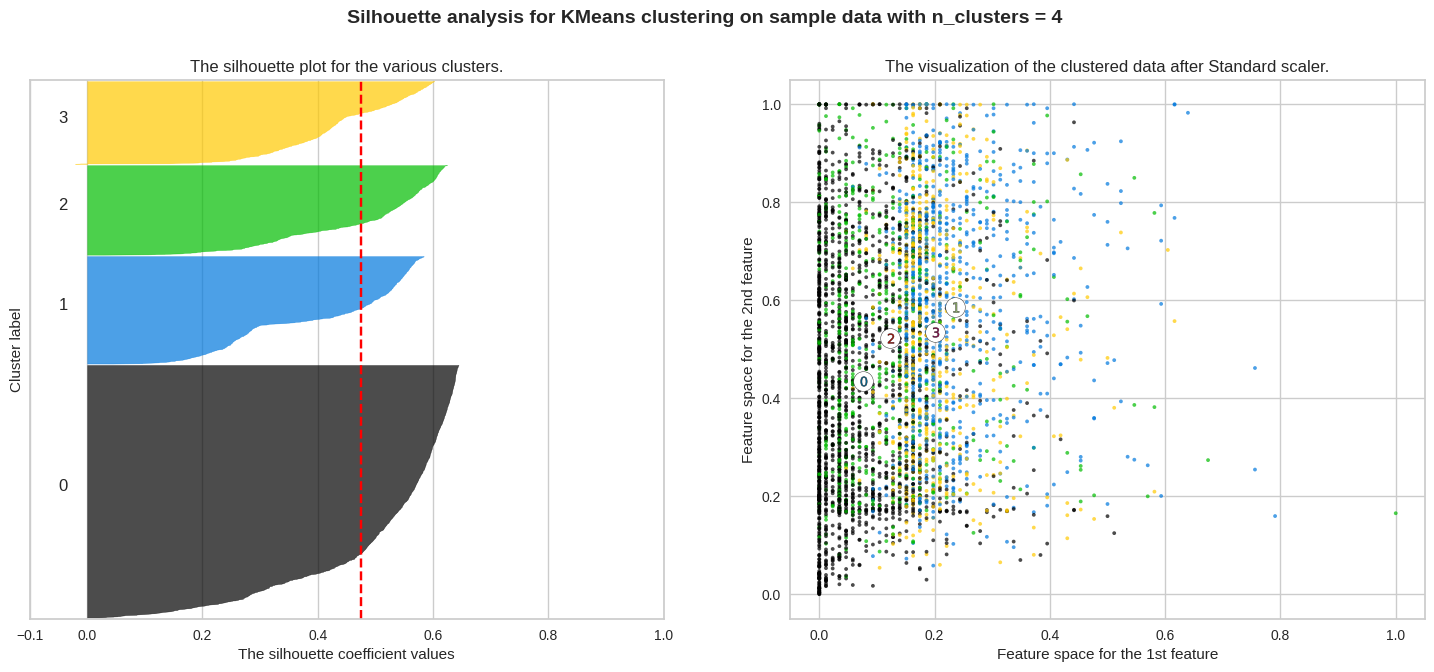

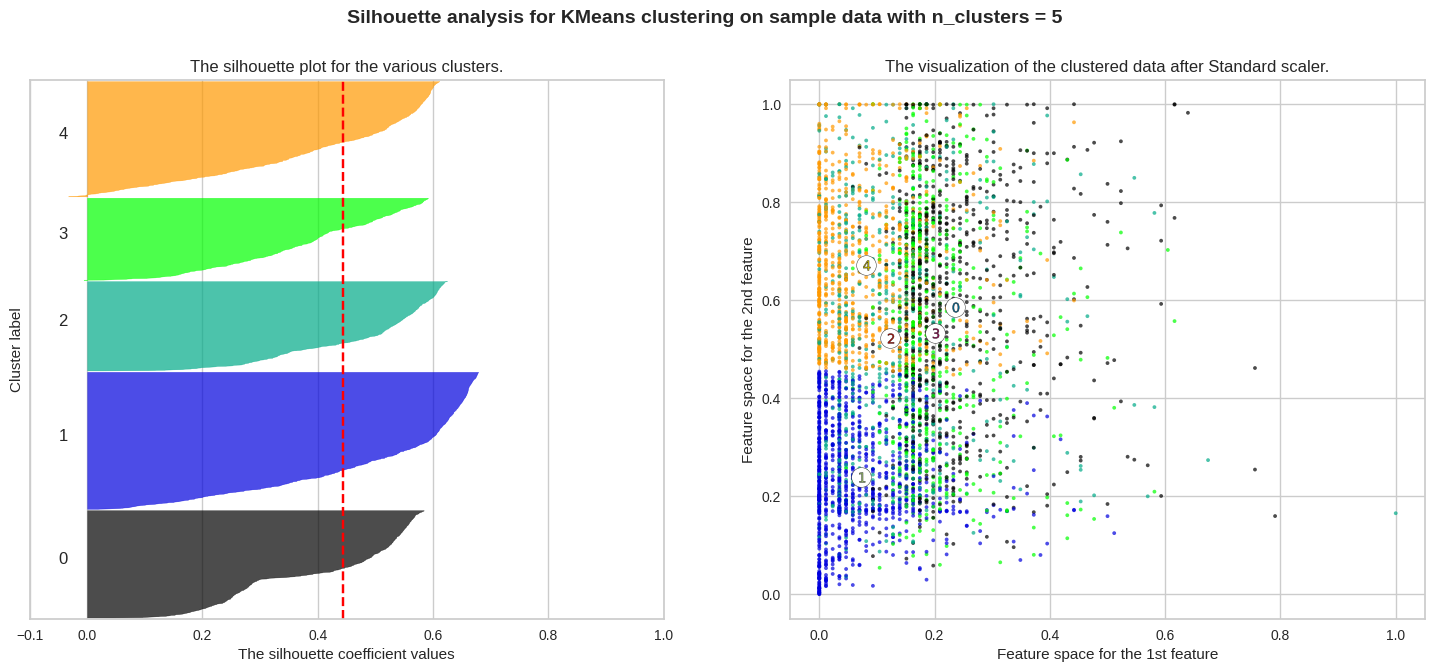

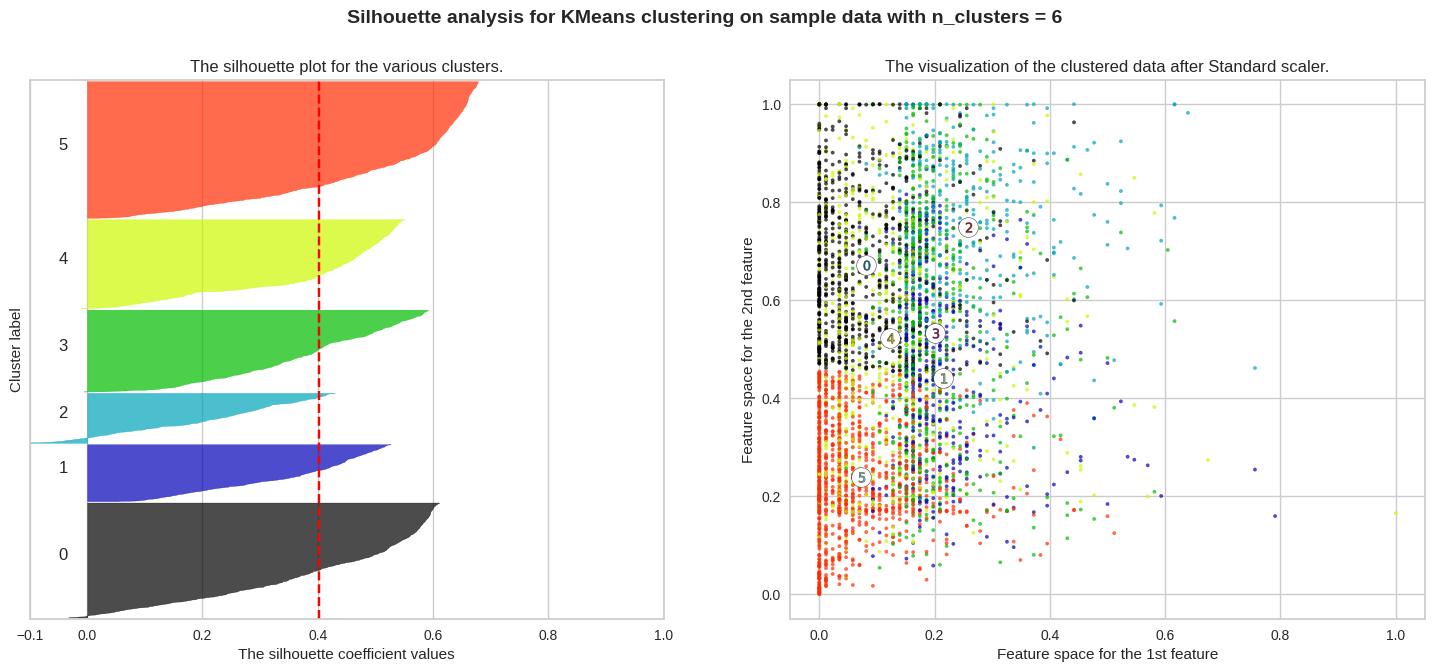

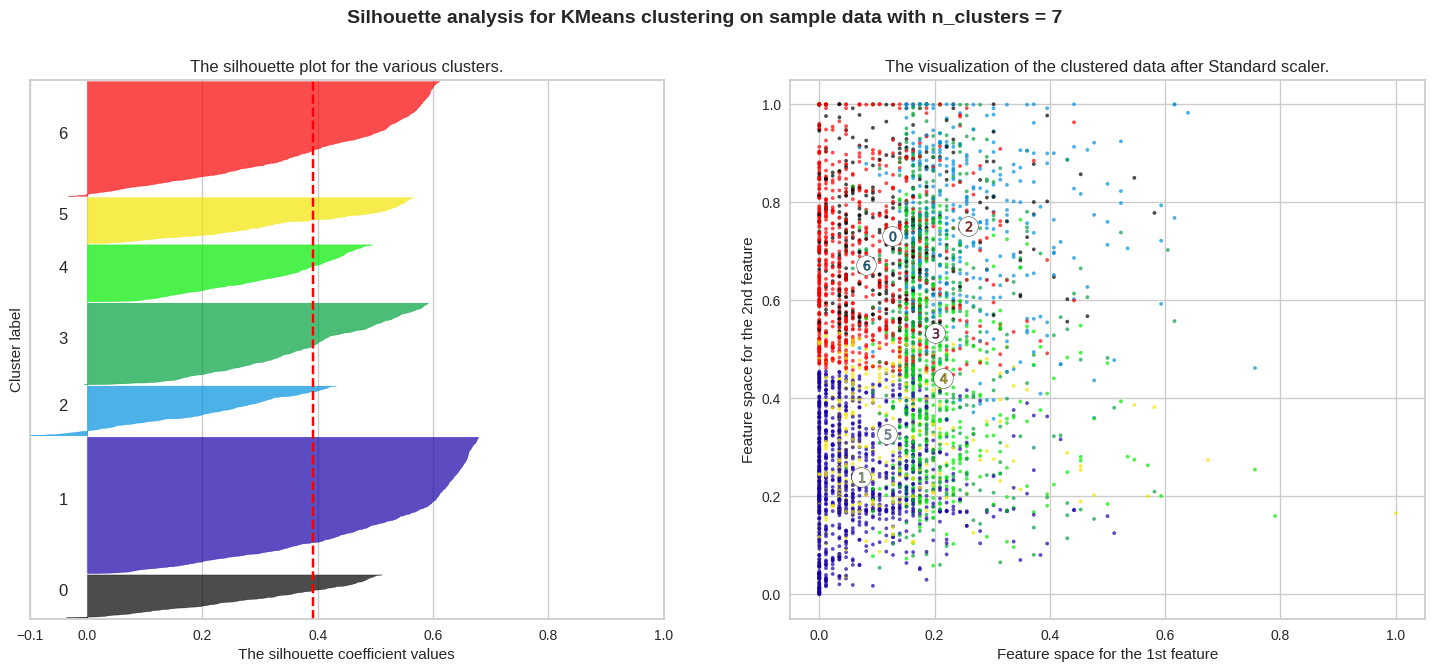

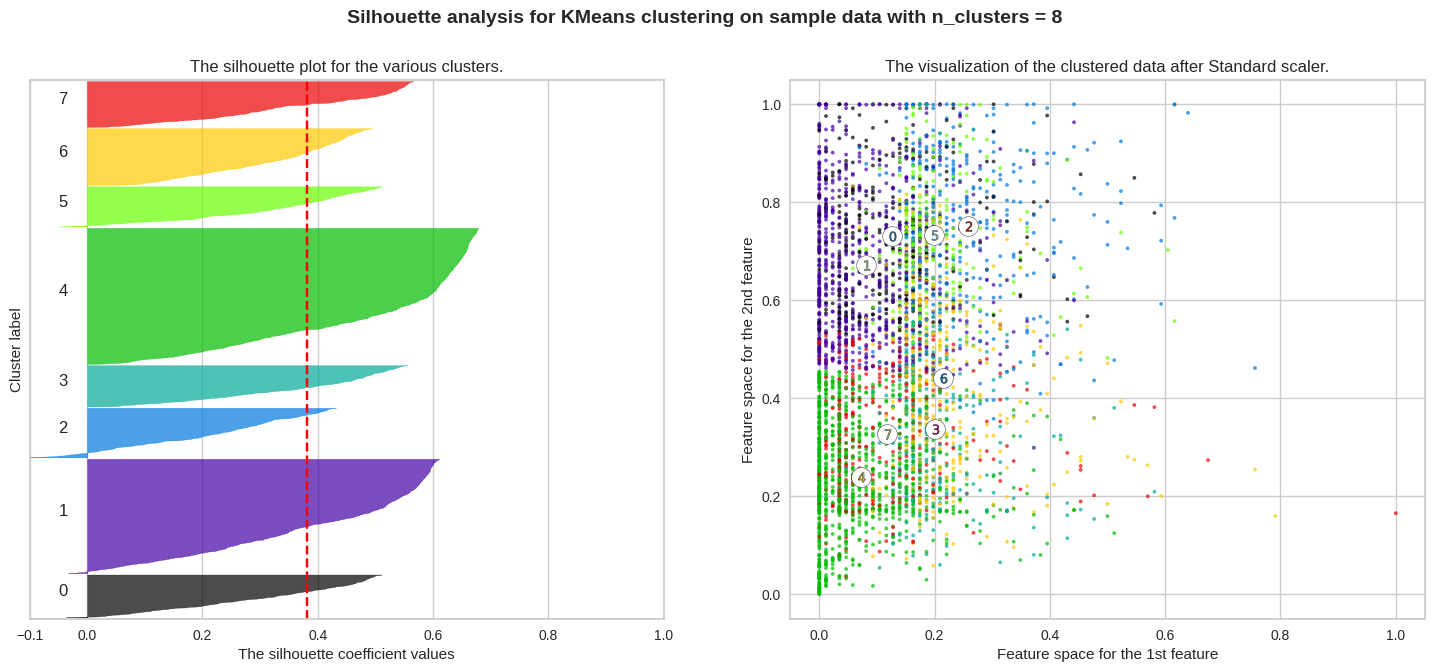

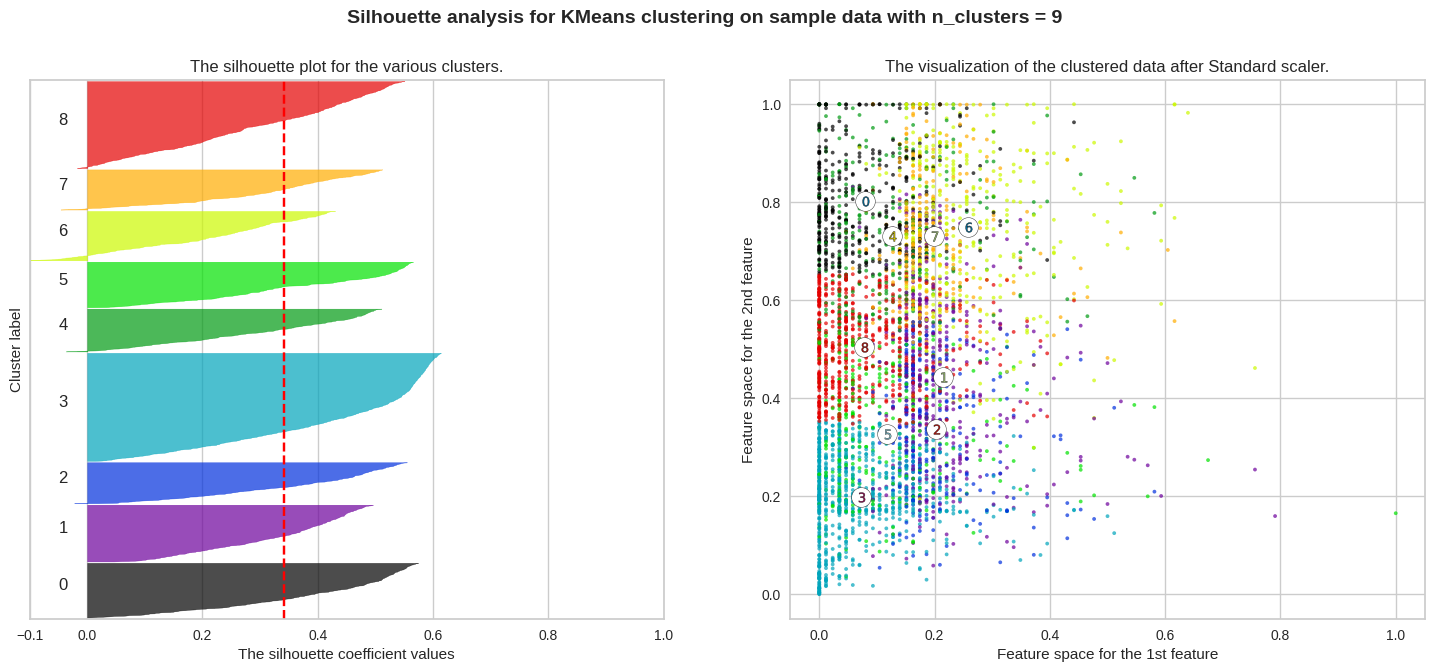

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)
    silhouette_avg = silhouette_score(minmax_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Insights**
 **The ideal number of clusters is 2, with a score higher 0.53**
# Building the model

In [ ]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
model_kmeans.inertia_

823.6756984125209

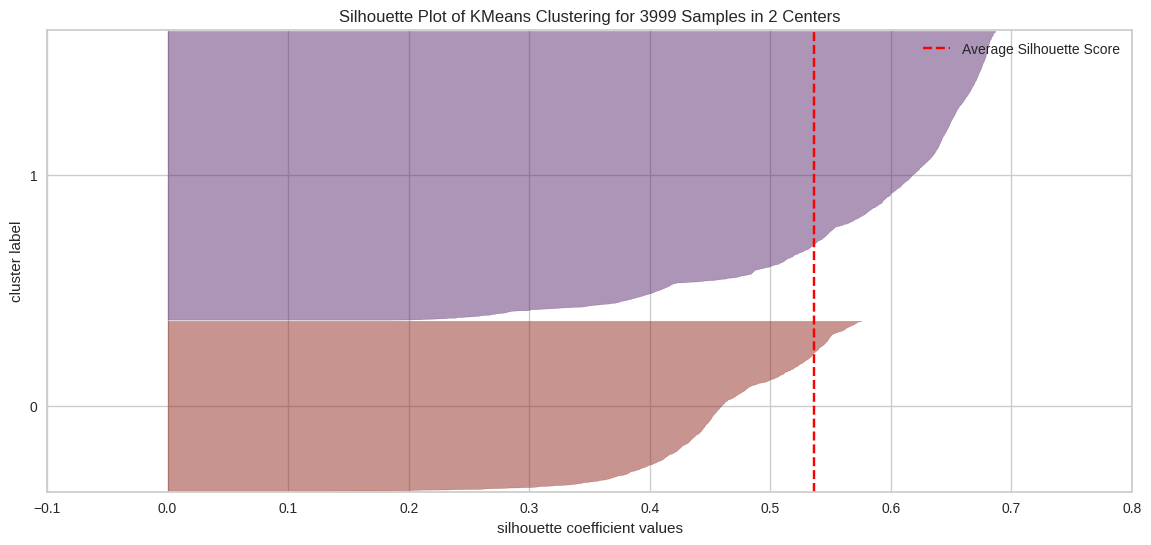

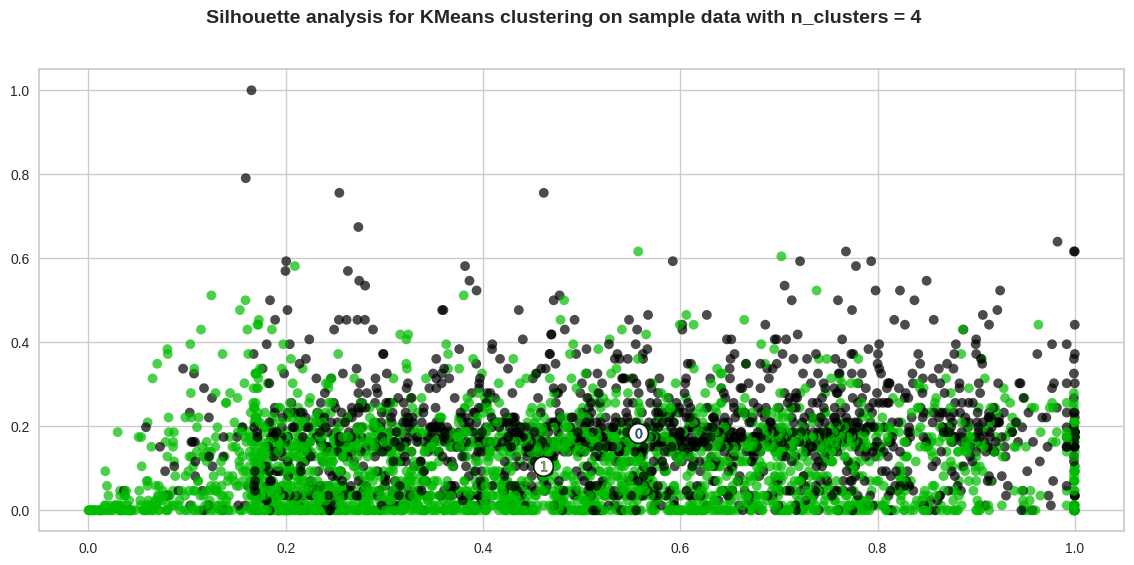

In [ ]:
data['Cluster'] = model_kmeans.labels_
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(14,6))
sil_visualizer1 = SilhouetteVisualizer(model_kmeans, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

plt.figure(figsize=(14,6))
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
sns.scatterplot(x=minmax_df[:, 9],y= minmax_df[:, 6], s=50, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')
centers1 = model_kmeans.cluster_centers_

sns.scatterplot(x=centers1[:, 9], y=centers1[:, 6], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    plt.scatter(c[9], c[6], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

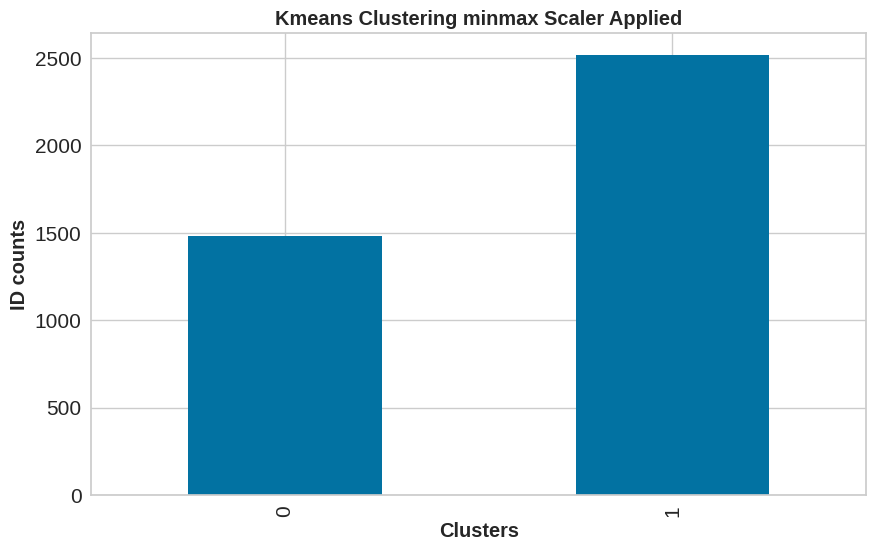

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Cluster']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering minmax Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

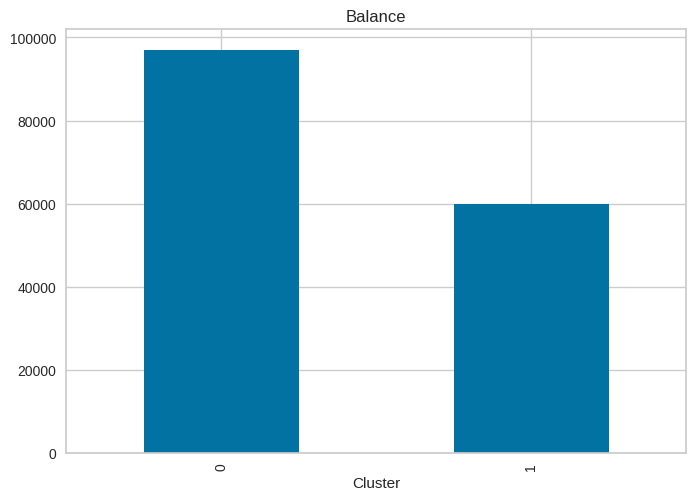

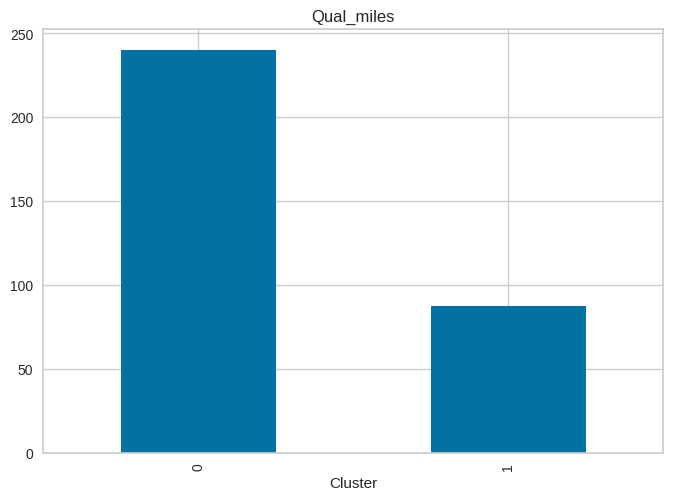

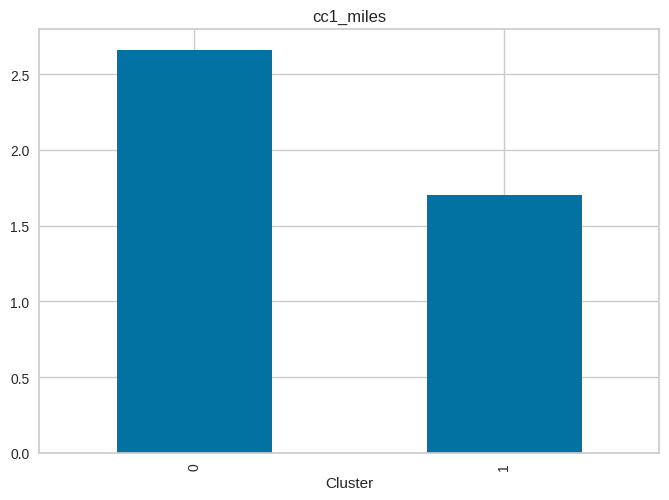

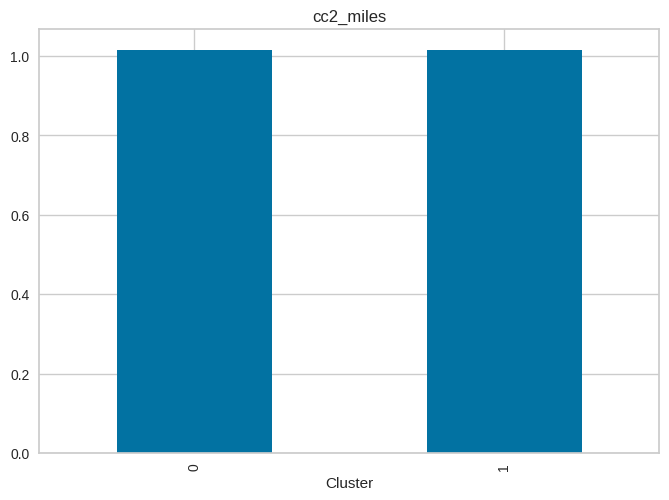

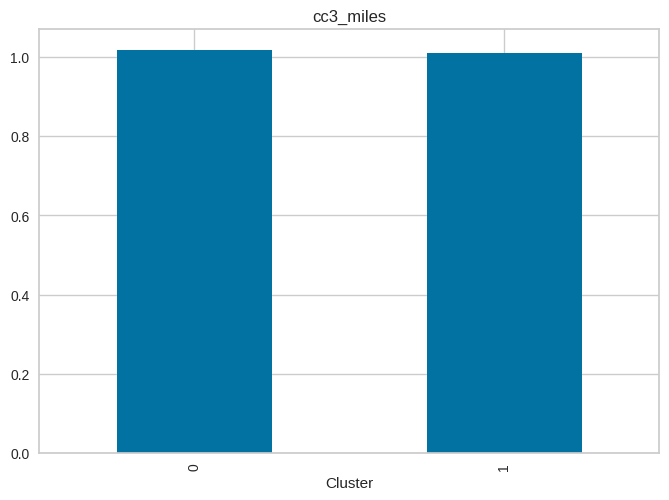

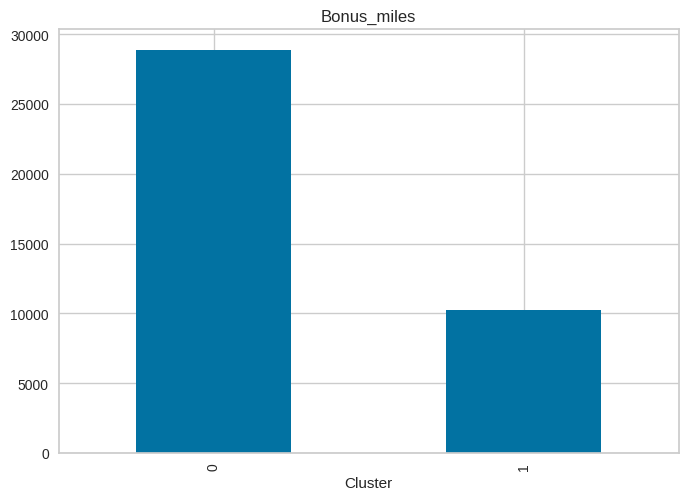

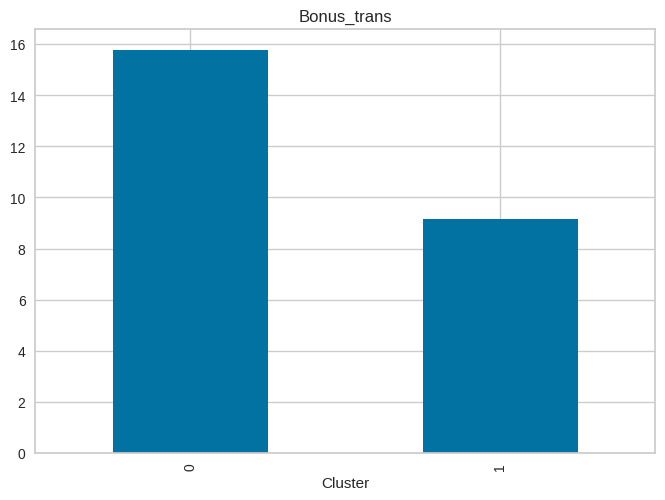

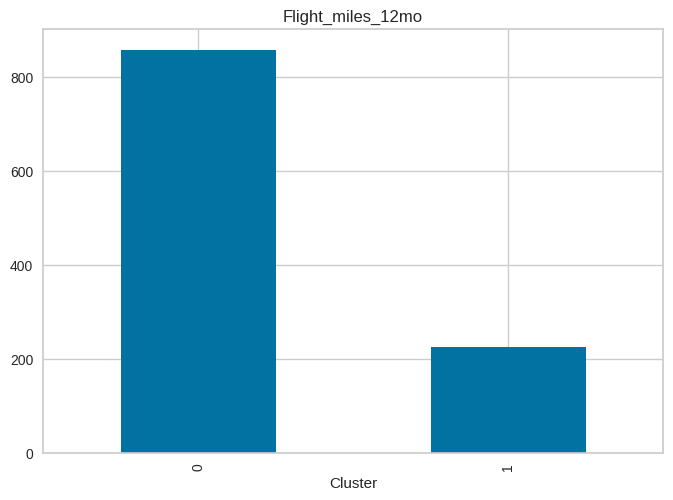

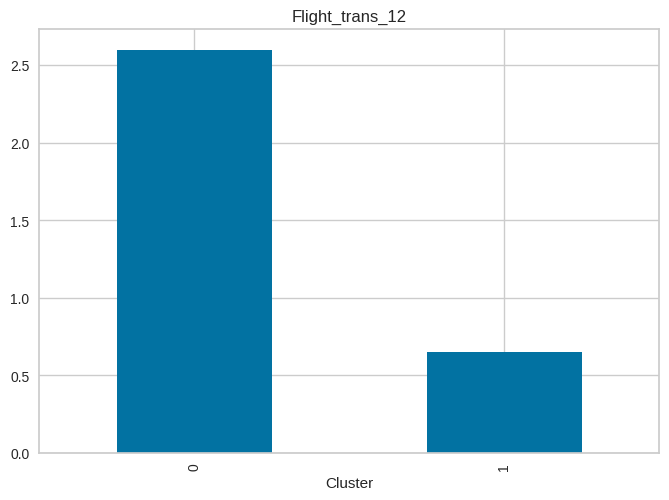

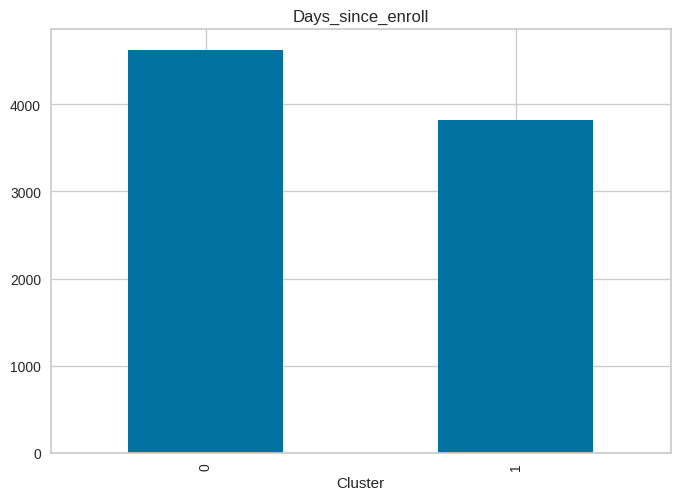

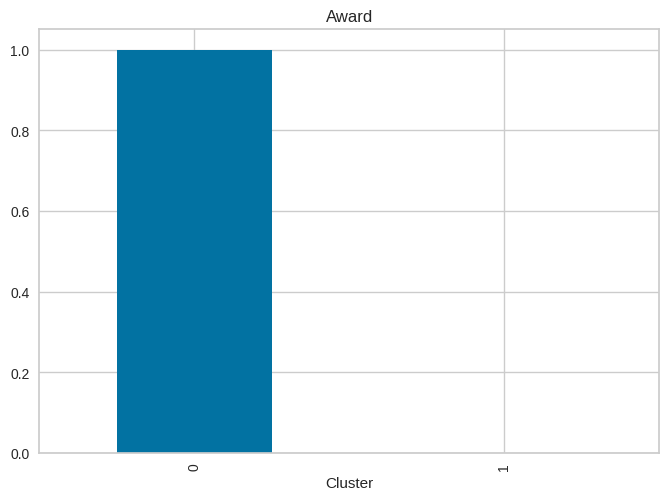

In [ ]:
for i in data.columns[1:-1]:
    plt.figure()
    data.groupby('Cluster')[i].mean().plot.bar(title=i)

# **insights**
+ **Cluster0  group of fliers that earn the most out of the card and are frequent fliers**<br>
+ **Cluster1 group of fliers that earn the least and are the least frequent fliers**


---






# **Hierarchical Clustering**
## On minimax data

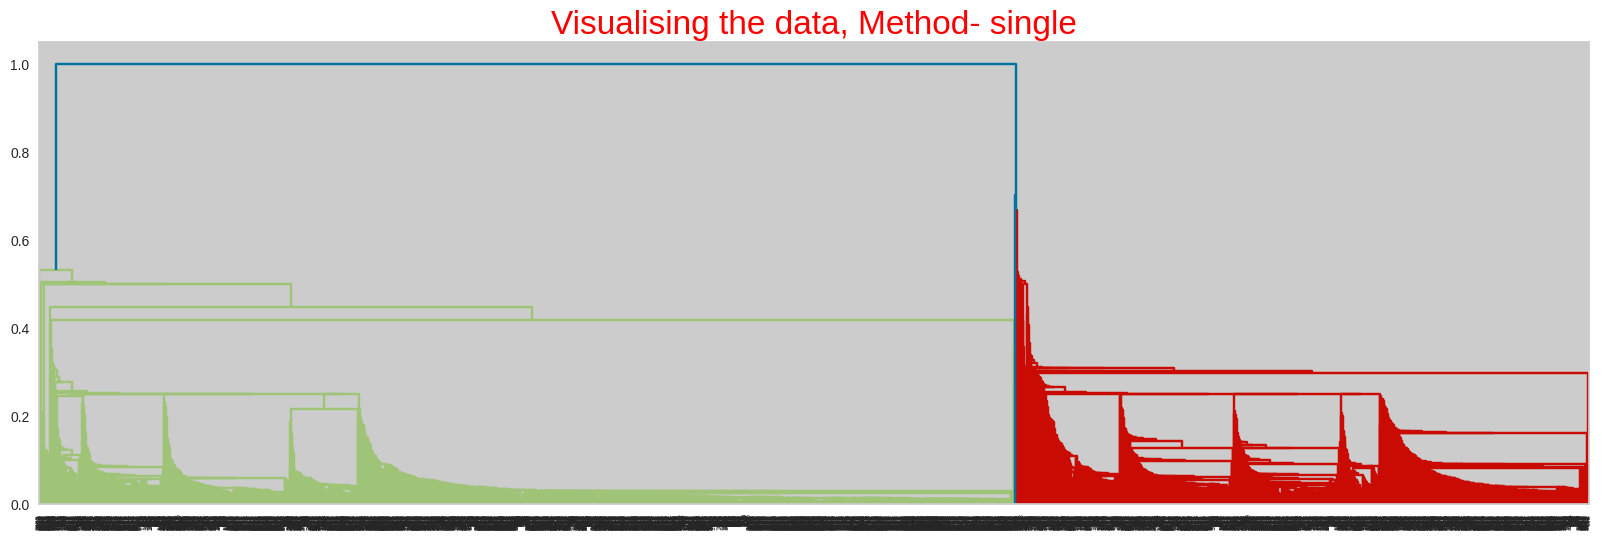

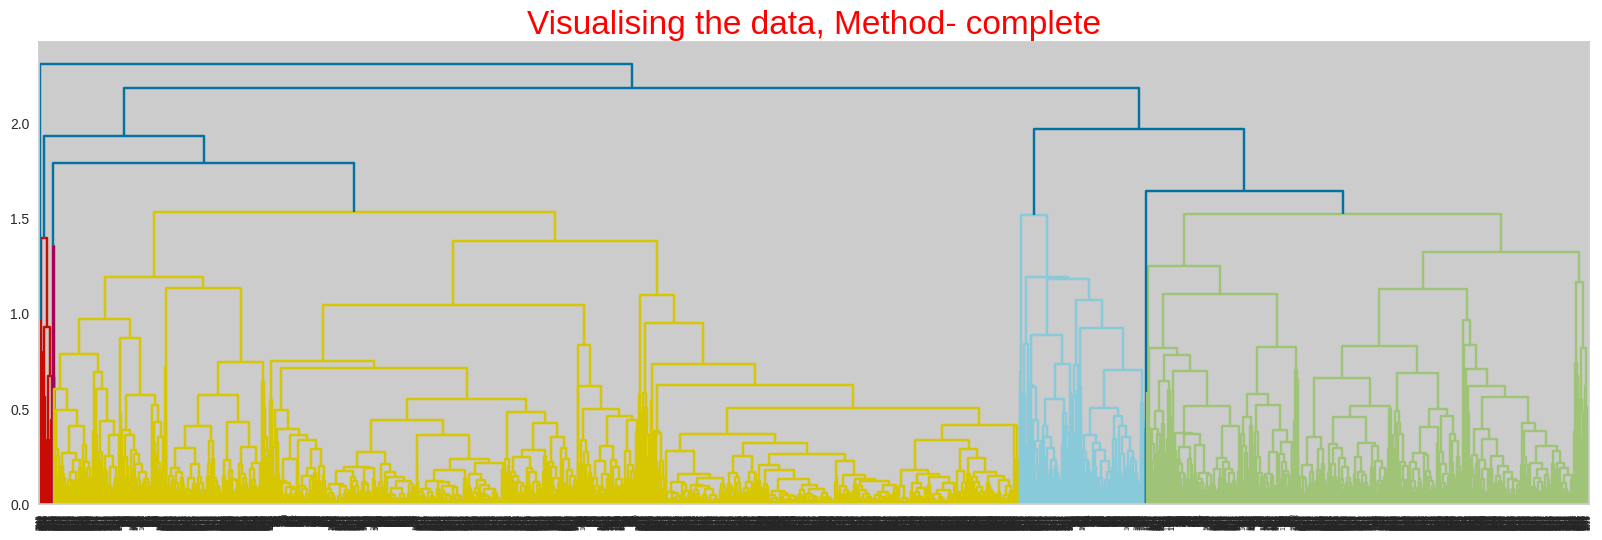

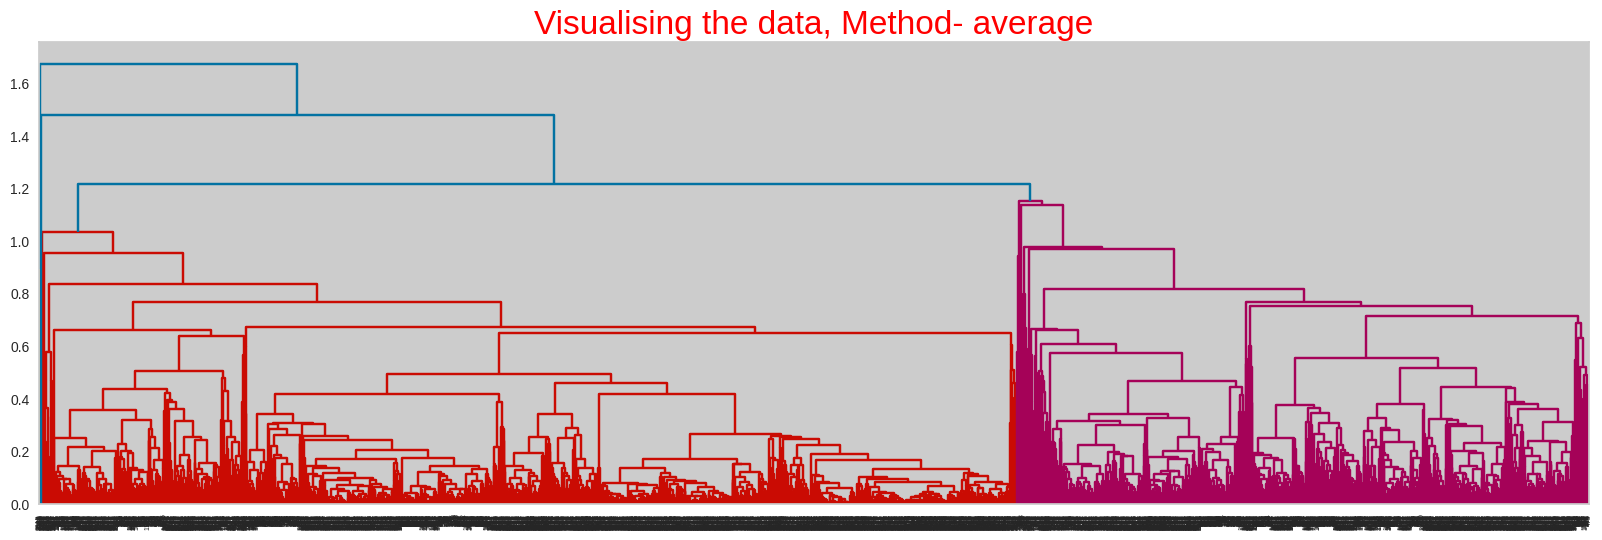

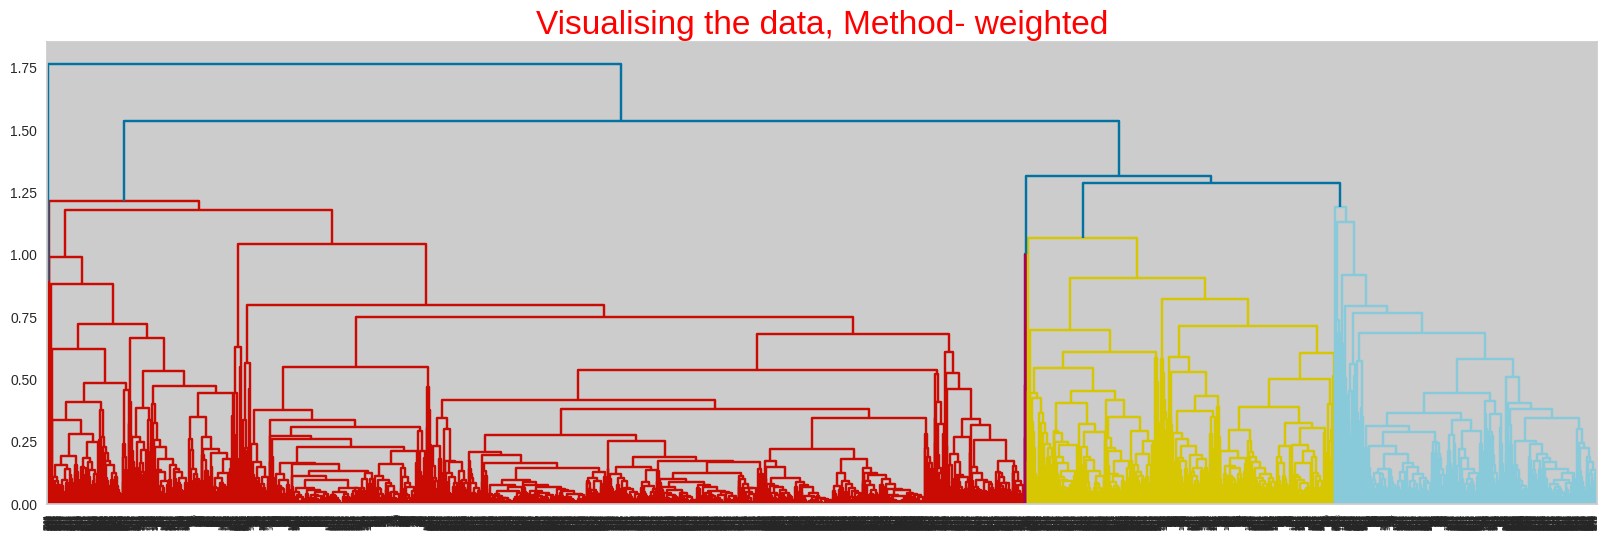

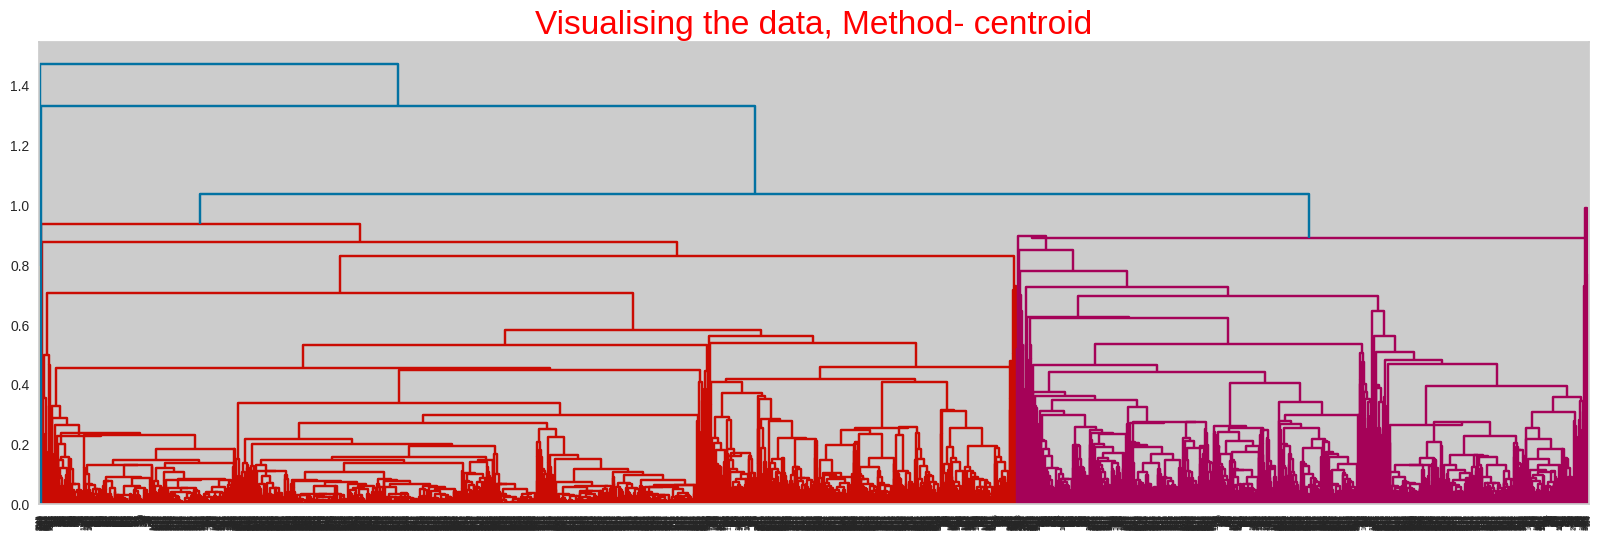

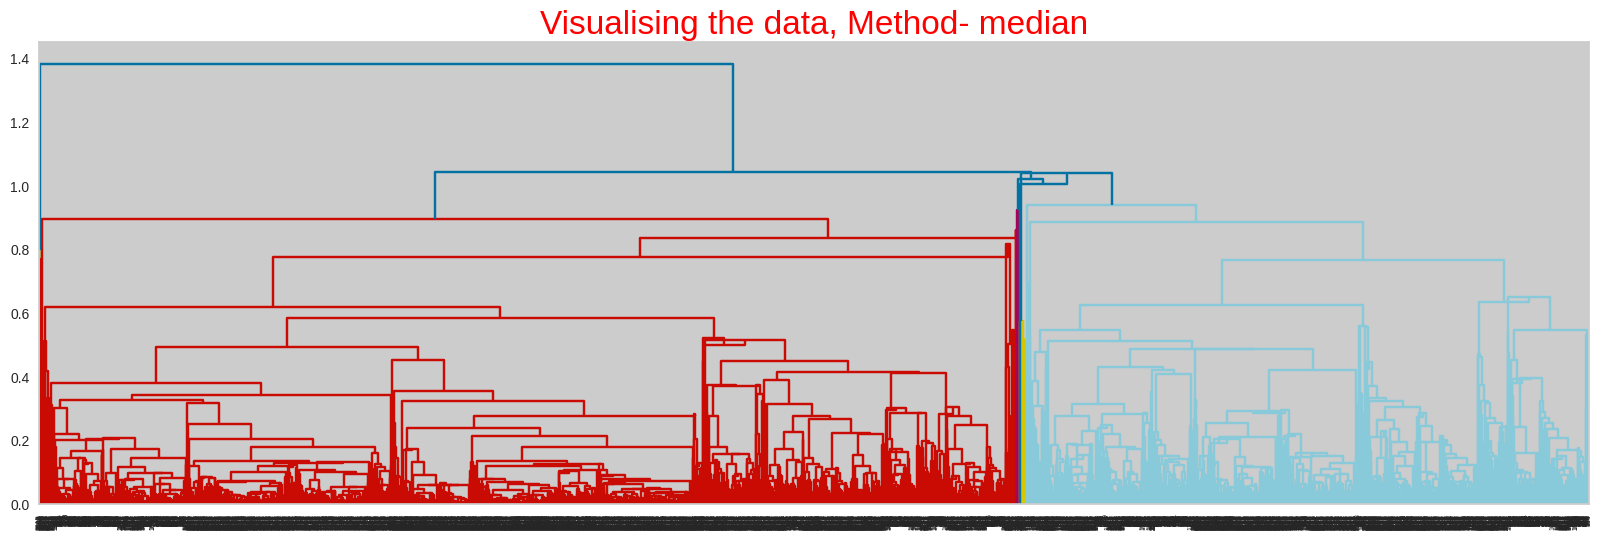

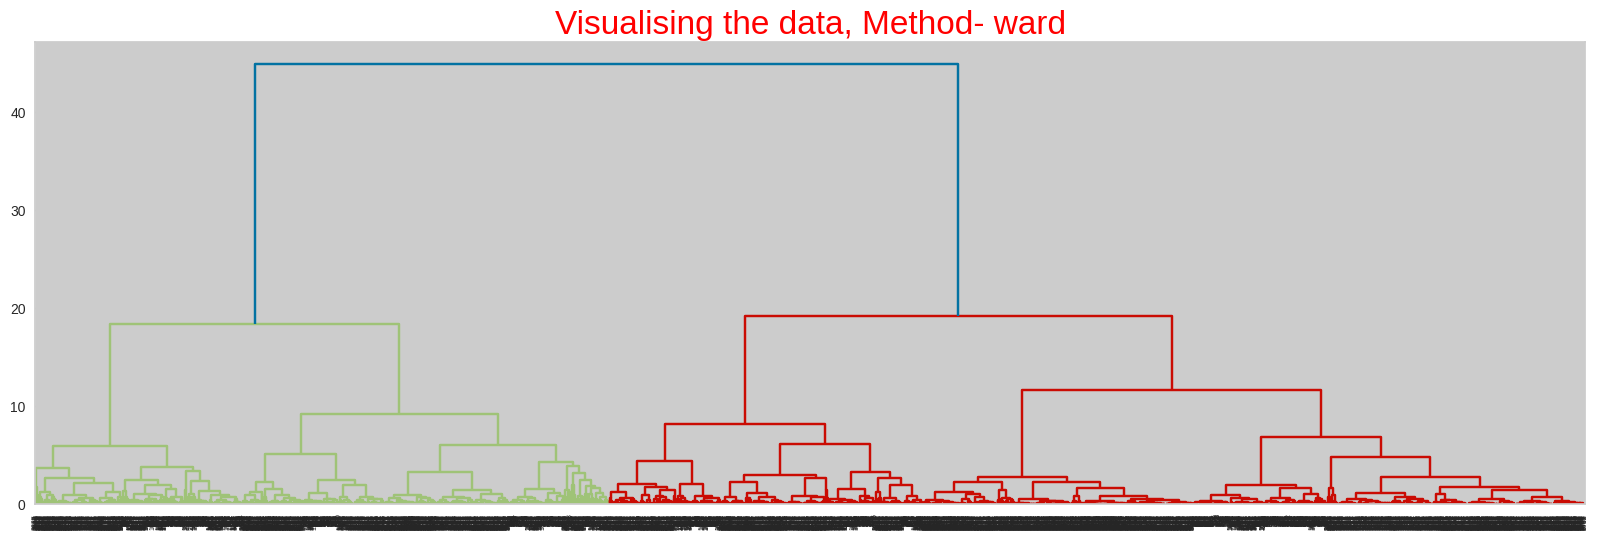

In [ ]:
import scipy.cluster.hierarchy as sch
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [144]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = silhouette_score(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

**Model with cluster 2 and ward linkage have high score**

In [158]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(minmax_df)
silhouette_score(minmax_df,model.labels_)

0.535930510919477

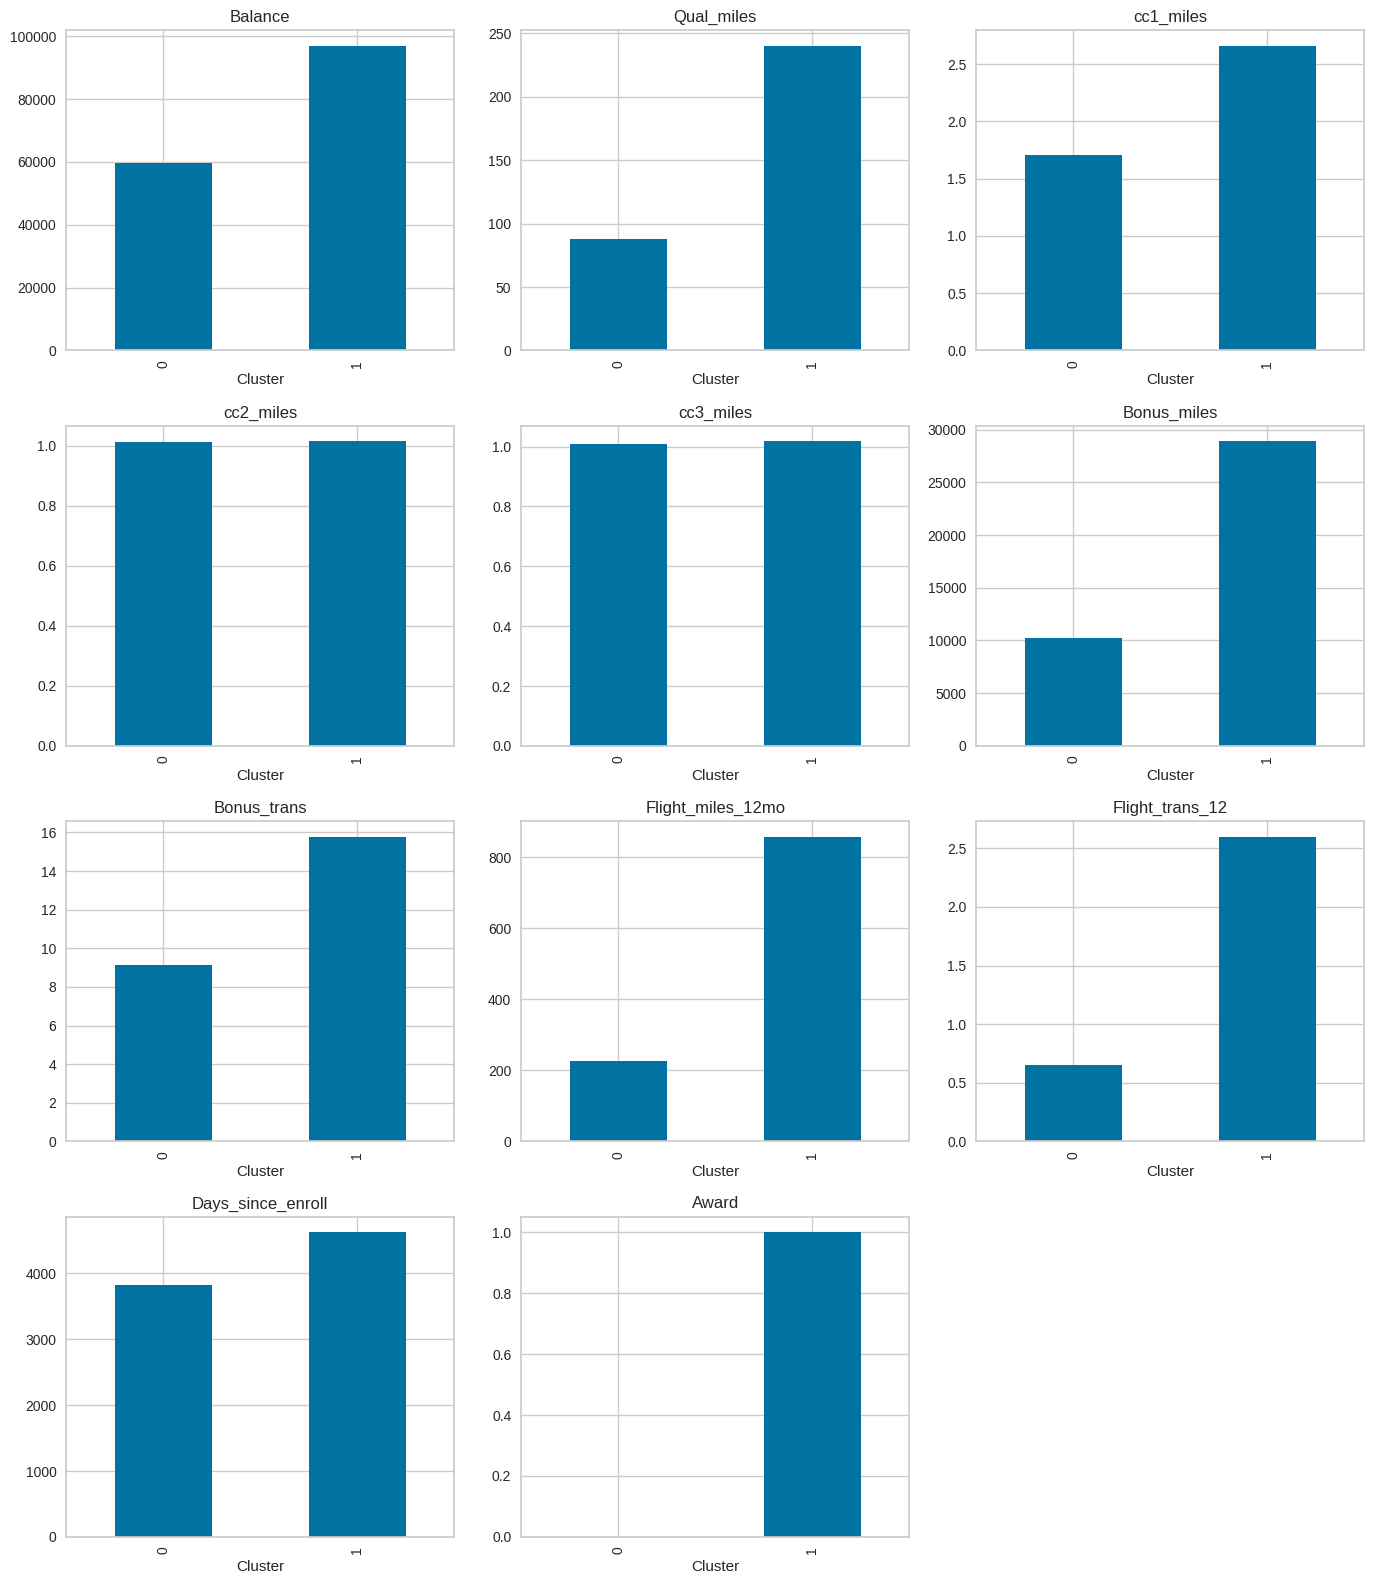

In [178]:
data['Cluster']=model.labels_
f,ax=plt.subplots(4,3,figsize=(14,16))
ax=ax.ravel()
for j,i in enumerate(data.columns[:-1]):
    data.groupby('Cluster')[i].mean().plot.bar(title=i,ax=ax[j])
plt.tight_layout()
ax[-1].remove()

## On standard scaled data

In [197]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = silhouette_score(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

**Model with cluster 2 and single linkage have high score**

In [198]:
model = AgglomerativeClustering(n_clusters=2,linkage='single')
model.fit(std_df)
silhouette_score(std_df,model.labels_)

0.8562820070415407

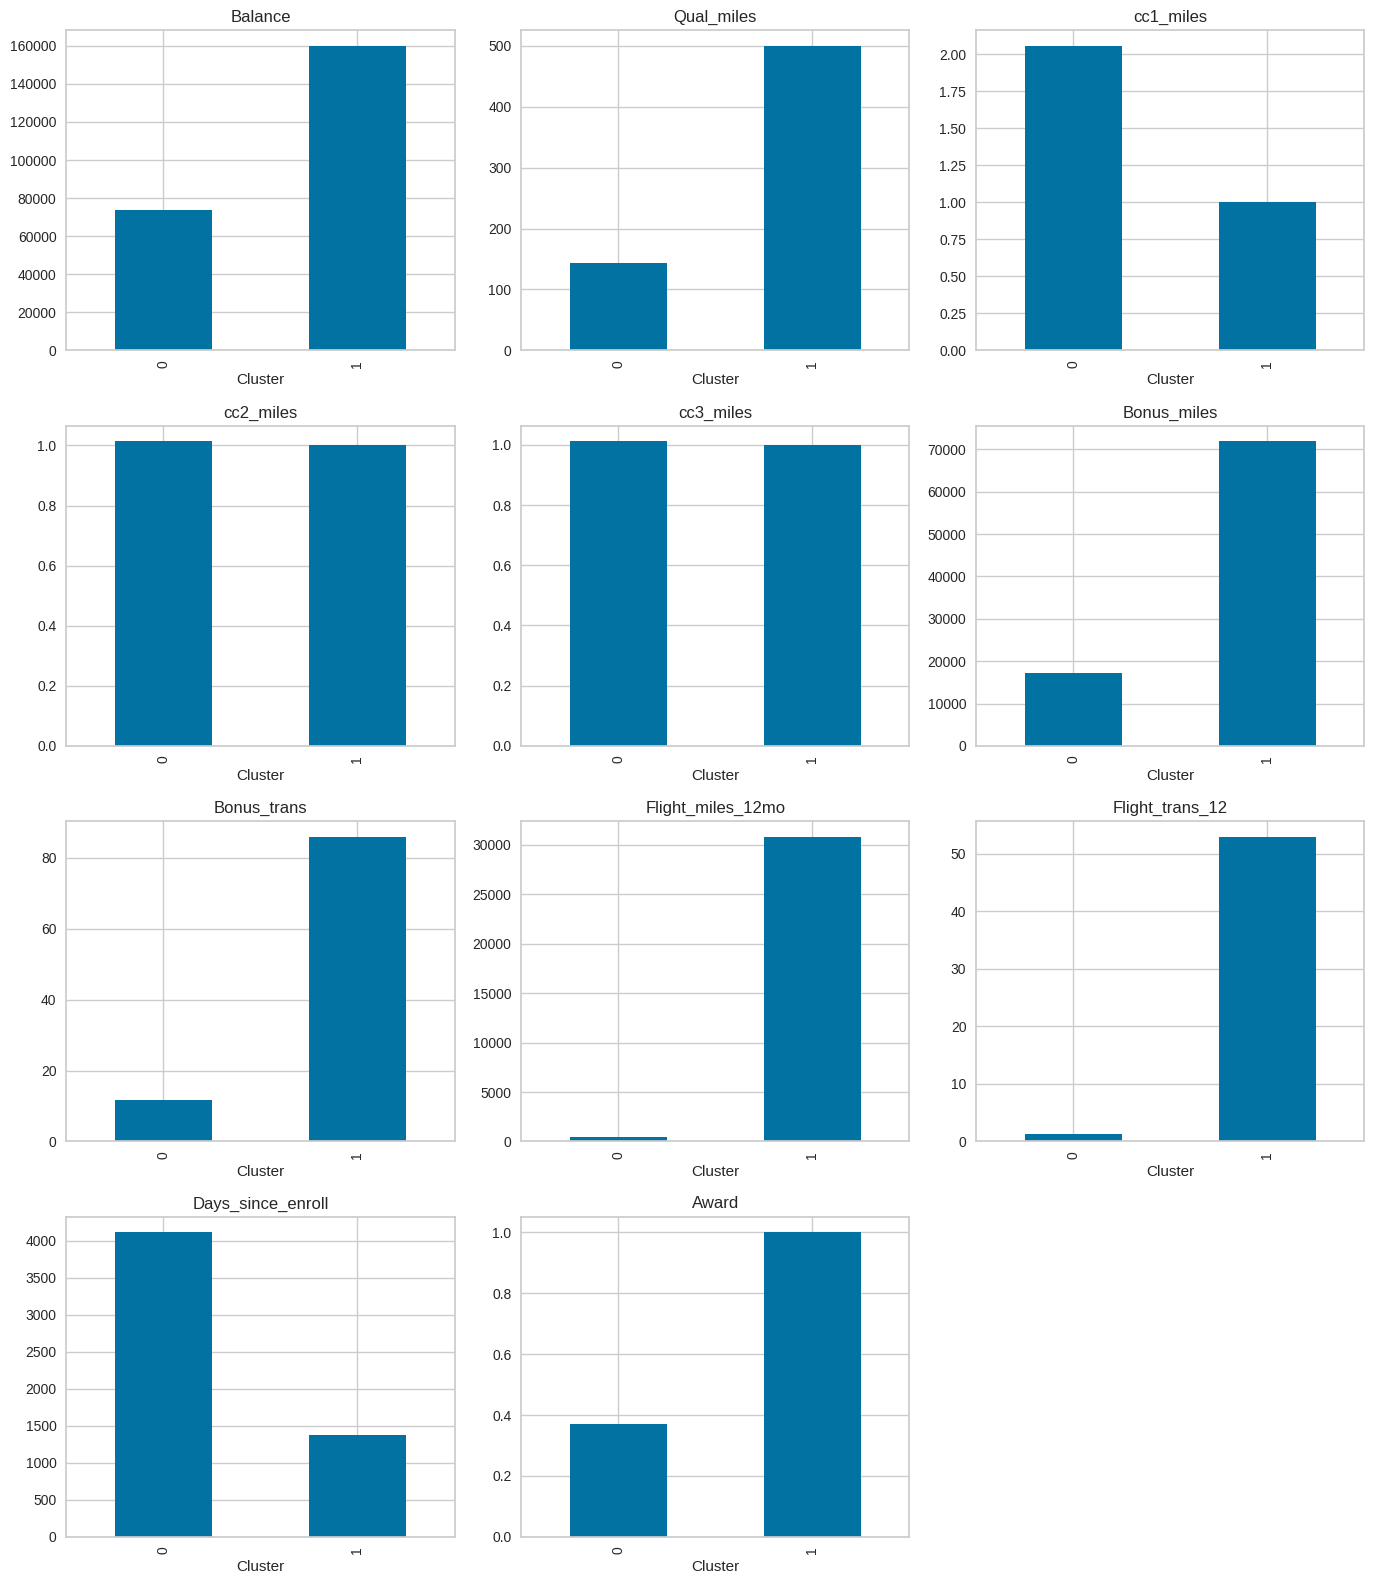

In [199]:
data['Cluster']=model.labels_
f,ax=plt.subplots(4,3,figsize=(14,16))
ax=ax.ravel()
for j,i in enumerate(data.columns[:-1]):
    data.groupby('Cluster')[i].mean().plot.bar(title=i,ax=ax[j])
plt.tight_layout()
ax[-1].remove()



---



---


# **3 - DBSCAN**
## on standard scaled data

In [206]:
from sklearn.cluster import DBSCAN
from itertools import product
eps_values = np.arange(0.25,3,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

Text(0.5, 1.0, 'Number of clusters')

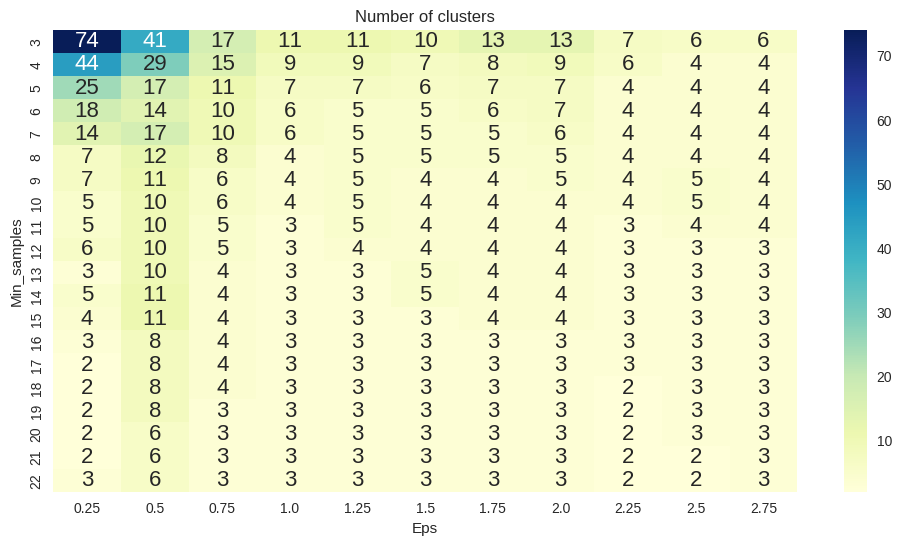

In [207]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score
pivot = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters');

Text(0.5, 1.0, 'Silhouette score')

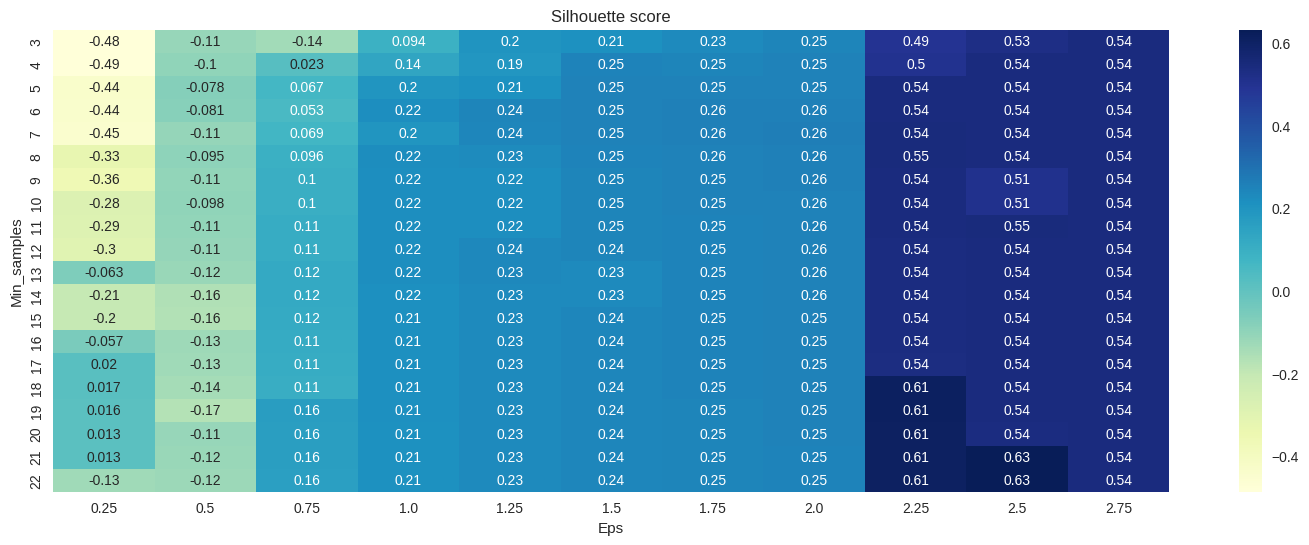

In [209]:
pivot = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette score')

## Global maximum is 0.63 for eps=2.5 and min_samples=21

In [211]:
epsilon = np.arange(0.25,3,0.25)
min_samples = np.arange(3,22)
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [218]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)
np.unique(dbscan.labels_)

array([-1,  0])

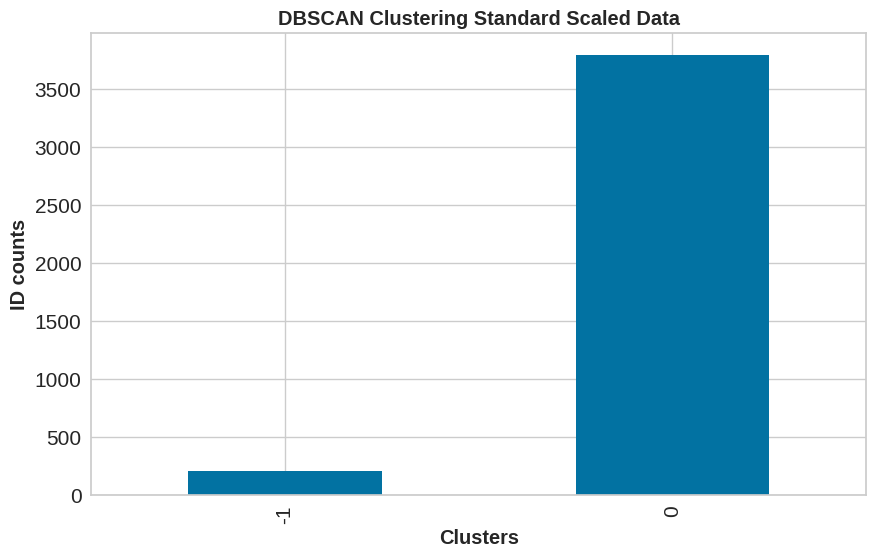

In [216]:
data['Cluster'] = dbscan.labels_
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Cluster']).count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **on MinMax Scaled Data**

In [219]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


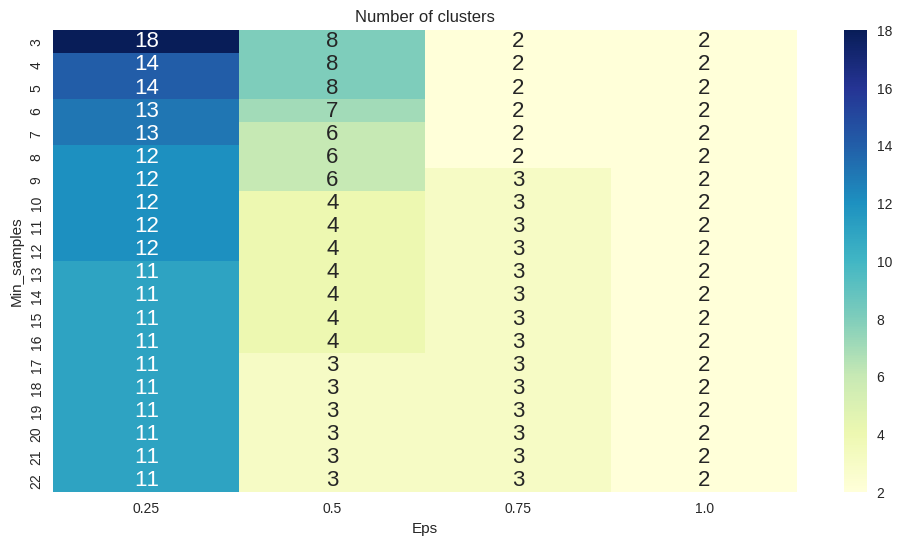

In [221]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

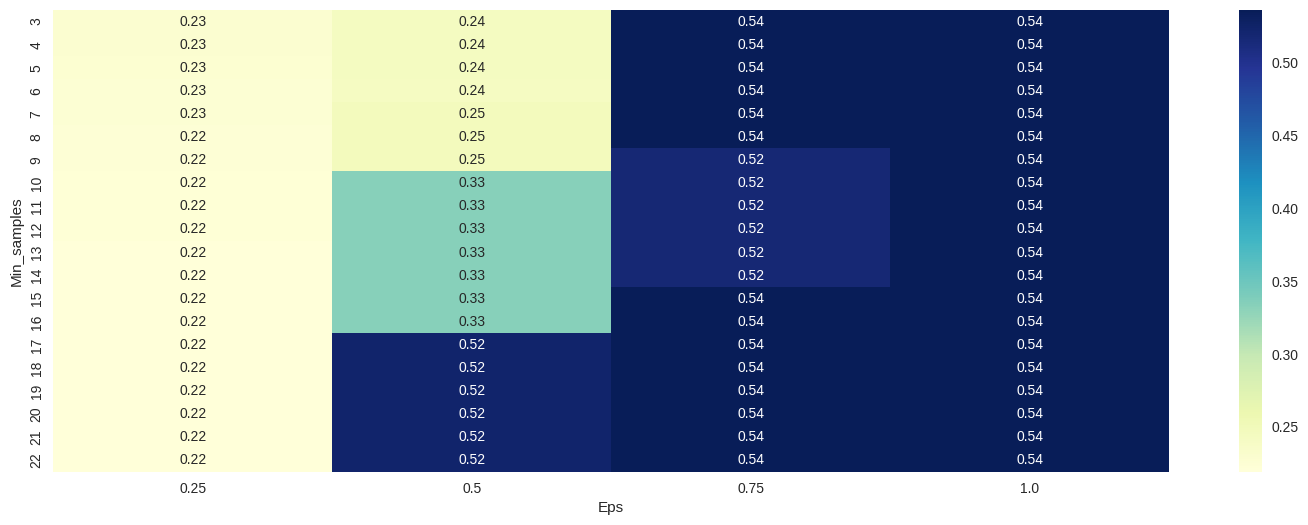

In [222]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

## Global maximum is 0.54 for eps=1.0 and min_samples 22 to 3

In [225]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


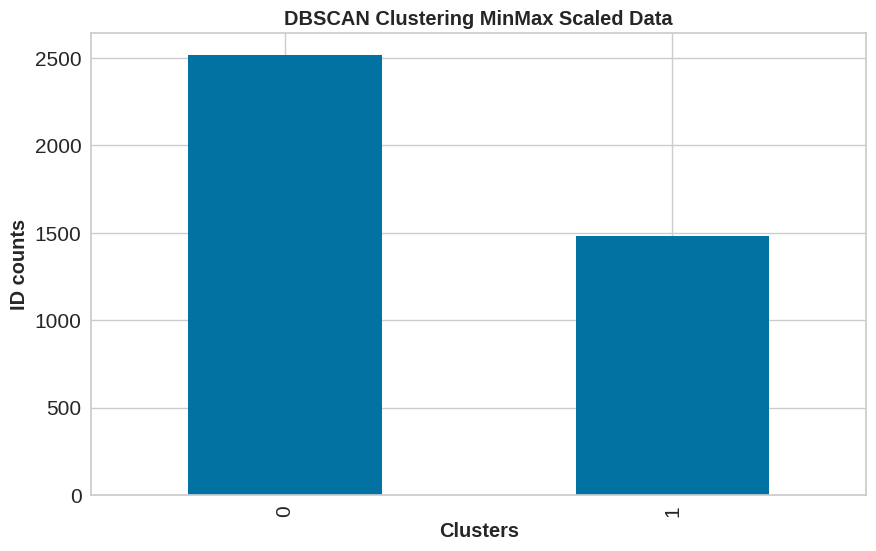

In [229]:
dbscan = DBSCAN(eps=.75, min_samples=3)
dbscan.fit(minmax_df)
data['Cluster'] = dbscan.labels_
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Cluster']).count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()



---

